# Introduction: Airline Arrivals Project
* Yeu cau:
    Use this dataset of airline arrival information to predict how late flights will be. A flight only counts as late if it is more than 30 minutes late.
    1. The project should follow guideline as previous projects.
    2. Apply models in Naïve Bayes, Logistic Regression, Decision Tree, Random Forest, Gradient Boosting and SVM.
    3. Apply PCA, SelectKBest and RFE for feature selections.
    4. Using gridsearchCV to obtain best parameters for models.
    5. Compare performances among models, write up analysis why the model is good or bad in the algorithmic approach (explain why the algorithm is good or bad for the dataset structure, can you do something to improve the model?)
    6. Include the conclusions.

Variable descriptions
- 1	Year	1987-2008
- 2	Month	1-12
- 3	DayofMonth	1-31
- 4	DayOfWeek	1 (Monday) - 7 (Sunday)
- 5	DepTime	actual departure time (local, hhmm)
- 6	CRSDepTime	scheduled departure time (local, hhmm)
- 7	ArrTime	actual arrival time (local, hhmm)
- 8	CRSArrTime	scheduled arrival time (local, hhmm)
- 9	UniqueCarrier	unique carrier code
- 10	FlightNum	flight number
- 11	TailNum	plane tail number
- 12	ActualElapsedTime	in minutes
- 13	CRSElapsedTime	in minutes
- 14	AirTime	in minutes
- 15	ArrDelay	arrival delay, in minutes
- 16	DepDelay	departure delay, in minutes
- 17	Origin	origin IATA airport code
- 18	Dest	destination IATA airport code
- 19	Distance	in miles
- 20	TaxiIn	taxi in time, in minutes
- 21	TaxiOut	taxi out time in minutes
- 22	Cancelled	was the flight cancelled?
- 23	CancellationCode	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
- 24	Diverted	1 = yes, 0 = no
- 25	CarrierDelay	in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
- 26	WeatherDelay	in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
- 27	NASDelay	in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
- 28	SecurityDelay	in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
- 29	LateAircraftDelay	in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import pandas_profiling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
data = pd.read_csv('D:/machine learning/project/airlinedelaycauses/DelayedFlights.csv')
data.shape

(1936758, 30)

In [3]:
data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
# xoa cot Unnamed khong su dung
data_trans = data.drop("Unnamed: 0", axis = 1) 

In [5]:
data_trans.describe(percentiles = [.1,.25,.5,.75,.95,.99])

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,1.928371e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,1.333059e+02,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,7.206007e+01,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
10%,2008.0,2.000000e+00,4.000000e+00,1.000000e+00,9.140000e+02,8.500000e+02,9.400000e+02,1.020000e+03,2.320000e+02,6.100000e+01,...,2.160000e+02,3.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,8.000000e+01,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,1.160000e+02,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,1.650000e+02,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
95%,2008.0,1.200000e+01,2.900000e+01,7.000000e+00,2.156000e+03,2.115000e+03,2.308000e+03,2.255000e+03,6.066000e+03,2.830000e+02,...,1.999000e+03,1.500000e+01,4.200000e+01,0.000000e+00,0.000000e+00,8.800000e+01,1.700000e+01,7.600000e+01,0.000000e+00,1.090000e+02
99%,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.312000e+03,2.230000e+03,2.349000e+03,2.348000e+03,7.246000e+03,3.650000e+02,...,2.565000e+03,2.700000e+01,7.700000e+01,0.000000e+00,0.000000e+00,1.930000e+02,9.800000e+01,1.670000e+02,0.000000e+00,1.960000e+02


In [6]:
data_trans.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [7]:
data_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 428.5+ MB


Từ các bảng dữ liệu trên ta thấy:
- Year chỉ có giá trị 1 năm là 2008 nên ta có thể xóa cột này khi eda và build model
- Target la ArrDelay kieu numeric
- Cac numerical features la DepTime, CRSDepTime, ArrTime, CRSArrTime, ActualElapsedTime, CRSElapsedTime, AirTime, DepDelay, Distance, TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay
- Cac feature nhu Year, Month, DayofMonth, DayofWeek, Cancelled, Diverted tuy o bang thong tin o tren ta thay gia tri cua no la kieu int64, nhung ban chat la category nen ta xep vao nhom categorical features
- Do do các biến categorical features là Month, DayofMonth, DayofWeek, UniqueCarrier, FlightNum, TailNum, Origin, Dest, Cancelled, CancellationCode, Diverted  

In [8]:
data_trans = data_trans.drop('Year',axis = 1)

In [9]:
num_feature = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 
               'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 
               'SecurityDelay', 'LateAircraftDelay']
cat_feature = ['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum', 'TailNum', 'Origin', 'Dest', 'Cancelled', 
               'CancellationCode', 'Diverted']

# Phan tich bien ArrDelay

In [10]:
data['ArrDelay'].head(10)

0   -14.0
1     2.0
2    14.0
3    34.0
4    11.0
5    57.0
6     1.0
7    80.0
8    11.0
9    15.0
Name: ArrDelay, dtype: float64

count    1.928371e+06
mean     4.219988e+01
std      5.678472e+01
min     -1.090000e+02
10%      0.000000e+00
25%      9.000000e+00
50%      2.400000e+01
75%      5.600000e+01
95%      1.480000e+02
99%      2.560000e+02
max      2.461000e+03
Name: ArrDelay, dtype: float64


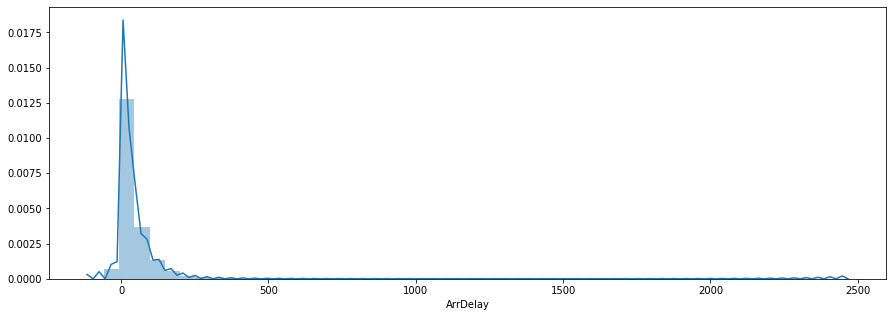

In [11]:
print(data['ArrDelay'].describe(percentiles=[.1,.25,.50,.75,.95,.99]))
plt.figure(figsize=(15,5))
sns.distplot(data['ArrDelay'])

# Phan tich cac numerical features

In [12]:
data_trans[num_feature + ['ArrDelay']].head(10)

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay
0,2003.0,1955,2211.0,2225,128.0,150.0,116.0,8.0,810,4.0,8.0,NaN,NaN,NaN,NaN,NaN,-14.0
1,754.0,735,1002.0,1000,128.0,145.0,113.0,19.0,810,5.0,10.0,NaN,NaN,NaN,NaN,NaN,2.0
2,628.0,620,804.0,750,96.0,90.0,76.0,8.0,515,3.0,17.0,NaN,NaN,NaN,NaN,NaN,14.0
3,1829.0,1755,1959.0,1925,90.0,90.0,77.0,34.0,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0,34.0
4,1940.0,1915,2121.0,2110,101.0,115.0,87.0,25.0,688,4.0,10.0,NaN,NaN,NaN,NaN,NaN,11.0
5,1937.0,1830,2037.0,1940,240.0,250.0,230.0,67.0,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0,57.0
6,706.0,700,916.0,915,130.0,135.0,106.0,6.0,828,5.0,19.0,NaN,NaN,NaN,NaN,NaN,1.0
7,1644.0,1510,1845.0,1725,121.0,135.0,107.0,94.0,828,6.0,8.0,8.0,0.0,0.0,0.0,72.0,80.0
8,1029.0,1020,1021.0,1010,52.0,50.0,37.0,9.0,162,6.0,9.0,NaN,NaN,NaN,NaN,NaN,11.0
9,1452.0,1425,1640.0,1625,228.0,240.0,213.0,27.0,1489,7.0,8.0,3.0,0.0,0.0,0.0,12.0,15.0


In [13]:
data_trans[num_feature].describe(percentiles = [.1,.25,.5,.75,.95,.99])

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.928371e+06,1.936560e+06,1.928371e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936303e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,1.333059e+02,1.343027e+02,1.082771e+02,4.318518e+01,7.656862e+02,6.812975e+00,1.823220e+01,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,7.206007e+01,7.134144e+01,6.864261e+01,5.340250e+01,5.744797e+02,5.273595e+00,1.433853e+01,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
10%,9.140000e+02,8.500000e+02,9.400000e+02,1.020000e+03,6.100000e+01,6.500000e+01,4.200000e+01,8.000000e+00,2.160000e+02,3.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,8.000000e+01,8.200000e+01,5.800000e+01,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.300000e+01,9.980000e+02,8.000000e+00,2.100000e+01,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
95%,2.156000e+03,2.115000e+03,2.308000e+03,2.255000e+03,2.830000e+02,2.840000e+02,2.540000e+02,1.430000e+02,1.999000e+03,1.500000e+01,4.200000e+01,8.800000e+01,1.700000e+01,7.600000e+01,0.000000e+00,1.090000e+02
99%,2.312000e+03,2.230000e+03,2.349000e+03,2.348000e+03,3.650000e+02,3.670000e+02,3.290000e+02,2.490000e+02,2.565000e+03,2.700000e+01,7.700000e+01,1.930000e+02,9.800000e+01,1.670000e+02,0.000000e+00,1.960000e+02


In [14]:
data_trans[['DepDelay','ArrDelay']].head(10)

,DepDelay,ArrDelay
0,8.0,-14.0
1,19.0,2.0
2,8.0,14.0
3,34.0,34.0
4,25.0,11.0
5,67.0,57.0
6,6.0,1.0
7,94.0,80.0
8,9.0,11.0
9,27.0,15.0


- Tu bang du lieu tren ta thay co cac feature: CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay day la cac khoang delay do nhieu yeu to khac nhau la: Carrier, Weather, NAS, Security, LateAircraft 
- Ngoai ra ta cung thay rang ArrDelay = CarrierDelay + WeatherDelay + NASDelay + SecurityDelay + LateAircraftDelay. Nghia la thoi gian bi delay cua chuyen bay chinh la tong thoi gian delay cua cac yeu to tren
- O day ta chi xem xet tong thoi gian bi delay (ArrDelay) de xem chuyen bay co bi tre hay ko. Do do ta khong su dung cac cot thoi gian delay cua tung yeu to tren va se xoa cac cot: CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay
- Ta xoa cot DepDelay vi khi gia tri DepDelay da biet thi ta gan nhu biet duoc chuyen bay do co bi tre hay ko, do do ta ko dua feature nay vao build cac model

In [15]:
data_trans.drop(['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DepDelay'], axis = 1, inplace = True)

In [16]:
# update lai cac numerical feature
num_feature = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 
               'Distance', 'TaxiIn', 'TaxiOut']

### Bieu do phan phoi cac numerical features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF071C48D0>,
      dtype=object)

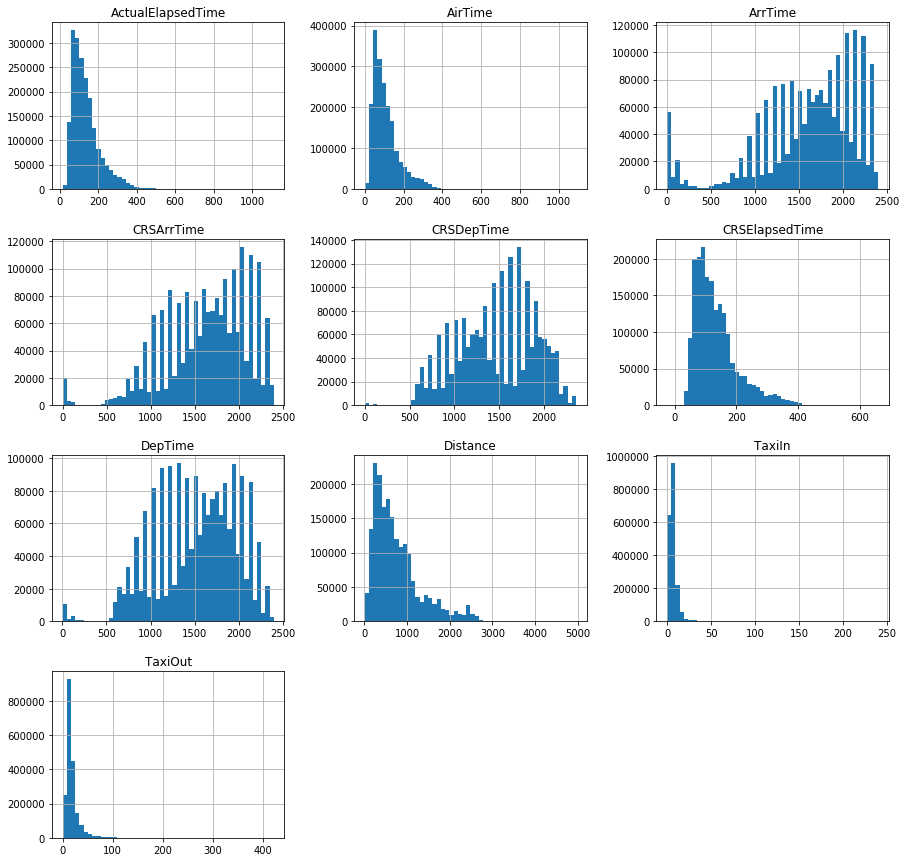

In [17]:
data_trans[num_feature].hist(figsize=(15, 15), bins=50)

# Phan tich cac Categorical features

In [18]:
data_trans[cat_feature].describe(percentiles = [.1,.25,.5,.75,.95,.99], include = 'all')

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,Origin,Dest,Cancelled,CancellationCode,Diverted
count,1.936758e+06,1.936758e+06,1.936758e+06,1936758,1.936758e+06,1936753,1936758,1936758,1.936758e+06,1936758,1.936758e+06
unique,NaN,NaN,NaN,20,NaN,5366,303,304,NaN,4,NaN
top,NaN,NaN,NaN,WN,NaN,N325SW,ATL,ORD,NaN,N,NaN
freq,NaN,NaN,NaN,377602,NaN,965,131613,108984,NaN,1936125,NaN
mean,6.111106e+00,1.575347e+01,3.984827e+00,NaN,2.184263e+03,NaN,NaN,NaN,3.268348e-04,NaN,4.003598e-03
std,3.482546e+00,8.776272e+00,1.995966e+00,NaN,1.944702e+03,NaN,NaN,NaN,1.807562e-02,NaN,6.314722e-02
min,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00
10%,2.000000e+00,4.000000e+00,1.000000e+00,NaN,2.320000e+02,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00
25%,3.000000e+00,8.000000e+00,2.000000e+00,NaN,6.100000e+02,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00
50%,6.000000e+00,1.600000e+01,4.000000e+00,NaN,1.543000e+03,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00


In [19]:
data_trans[cat_feature].head(10)

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,Origin,Dest,Cancelled,CancellationCode,Diverted
0,1,3,4,WN,335,N712SW,IAD,TPA,0,N,0
1,1,3,4,WN,3231,N772SW,IAD,TPA,0,N,0
2,1,3,4,WN,448,N428WN,IND,BWI,0,N,0
3,1,3,4,WN,3920,N464WN,IND,BWI,0,N,0
4,1,3,4,WN,378,N726SW,IND,JAX,0,N,0
5,1,3,4,WN,509,N763SW,IND,LAS,0,N,0
6,1,3,4,WN,100,N690SW,IND,MCO,0,N,0
7,1,3,4,WN,1333,N334SW,IND,MCO,0,N,0
8,1,3,4,WN,2272,N263WN,IND,MDW,0,N,0
9,1,3,4,WN,675,N286WN,IND,PHX,0,N,0


#### Xet cac chuyen bay Cancelled, Diverted

In [20]:
data_trans[data_trans['Cancelled']==1]['ArrDelay'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ArrDelay, dtype: float64

In [21]:
data_trans[data_trans['Diverted']==1]['ArrDelay'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ArrDelay, dtype: float64

- Tu bang du lieu tren ta thay doi voi cac chuyen bay bi Cancelled hay Diverted thi bien ArrDelay = NaN, tuc la cac chuyen bay nay khong duoc cho la delay
- Do do ta loai bo cac hang du lieu cua chuyen bay bi Cancelled hoac Diverted (tuc la Cancelled = 1 hoac Diverted = 1) vi khong anh huong den bien target
- Luc nay Cancelled va Diverted chi con gia tri bang 0 nen ta loai bo cac cot feature nay va feature CancellationCode 

In [22]:
# chi lay data co du lieu ma chuyen bay khong bi Cancelled va khong bi Diverted
data_trans = data_trans[(data_trans['Cancelled'] == 0) & (data_trans['Diverted'] == 0)]
data_trans.shape

(1928371, 22)

In [23]:
# xoa cac feature 'Cancelled','Diverted','CancellationCode'
data_trans.drop(['Cancelled','Diverted','CancellationCode'], axis = 1, inplace = True)

In [24]:
# update lai cac categorical feature
cat_feature = ['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum', 'TailNum', 'Origin', 'Dest']

In [25]:
# xem cac gia tri cua cac features
for catg in cat_feature:
    print(data_trans[catg].value_counts())
    print('#'*50)

12    201508
3     200116
6     199888
2     188625
1     182915
7     182171
8     161974
4     154783
5     152711
11    105148
10    103181
9      95351
Name: Month, dtype: int64
##################################################
22    71331
21    69897
1     67618
7     67203
15    65311
27    65056
20    64829
18    64776
19    64232
14    64129
24    64025
2     63152
10    63082
11    63080
23    62980
17    62816
8     62592
4     62252
26    62198
9     61826
6     61514
12    61316
13    61035
16    60870
28    60863
3     60219
5     59753
25    58757
29    56687
30    56433
31    38539
Name: DayofMonth, dtype: int64
##################################################
5    321982
1    289822
4    288344
7    284940
3    261498
2    259584
6    222201
Name: DayOfWeek, dtype: int64
##################################################
WN    376201
AA    190910
MQ    141223
UA    140904
OO    131780
DL    113728
XE    103147
CO     99731
US     98007
EV     81762
NW     78843
FL   

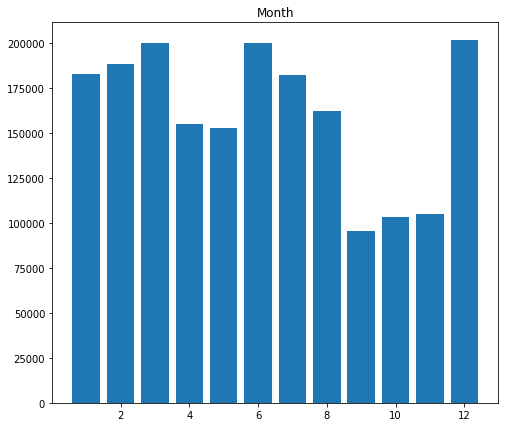

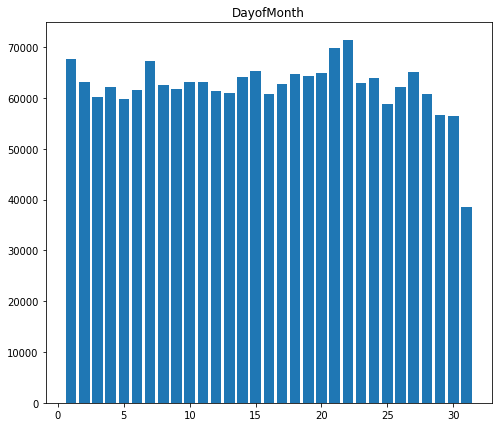

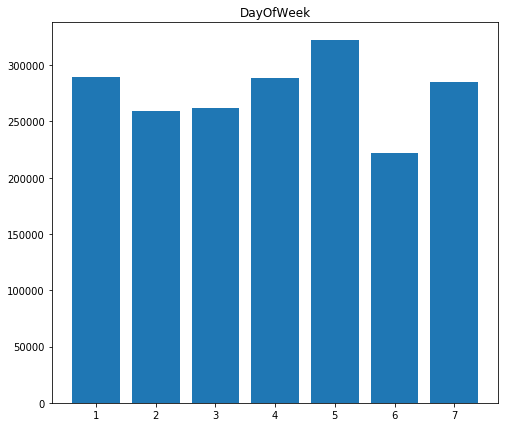

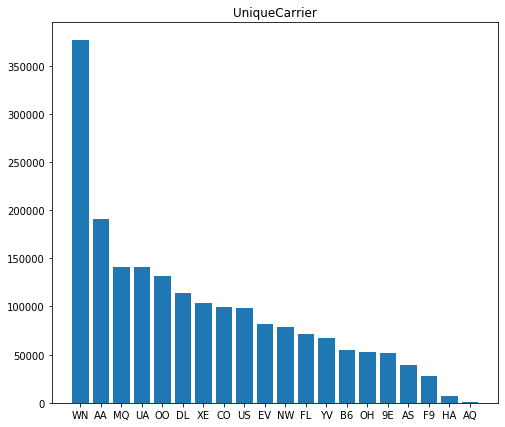

In [26]:
# cac feature 'FlightNum', 'TailNum', 'Origin', 'Dest' co so luong gia tri lon nen ko ve bieu do thong ke cac gia tri
for i in cat_feature[:4]:
    plt.figure(figsize=(8,7))
    f = data_trans[i].value_counts()
    plt.bar(f.index,f, align='center')
    plt.title(i)

# Check and treat missing value

In [27]:
# dataset = data_trans
total = data_trans.isnull().sum()
percent = data_trans.isnull().sum()/len(data)*100
missing_data = pd.concat([total,percent], axis=1,keys=['Total', 'Percent'])
missing_data

,Total,Percent
Month,0,0.000000
DayofMonth,0,0.000000
DayOfWeek,0,0.000000
DepTime,0,0.000000
CRSDepTime,0,0.000000
ArrTime,0,0.000000
CRSArrTime,0,0.000000
UniqueCarrier,0,0.000000
FlightNum,0,0.000000
TailNum,3,0.000155


In [28]:
# xoa cac missing value
data_trans = data_trans.dropna()

In [29]:
data_trans.isnull().sum().sum()

0

In [30]:
data_trans.shape

(1928368, 19)

# Tao cot bien target

In [31]:
# Xoa cac missing o ArrDelay roi sau do moi tao target, vi neu de missing value thi khi ap dung doan code phia duoi cac chuyen bay co ArrDelay =NaN lam cho target = 0 la ko dung
# cac chuyen bay co ArrDelay <30 thi khong duoc xem la late, set = 0 va >=30 set = 1
data_trans['target'] = data_trans['ArrDelay'].apply(lambda x: 1 if x>=30 else 0)

In [32]:
data_trans[['ArrDelay','target']].head(10)

,ArrDelay,target
0,-14.0,0
1,2.0,0
2,14.0,0
3,34.0,1
4,11.0,0
5,57.0,1
6,1.0,0
7,80.0,1
8,11.0,0
9,15.0,0


In [33]:
# xoa ArrDelay
data_trans.drop(['ArrDelay'], axis = 1, inplace = True)

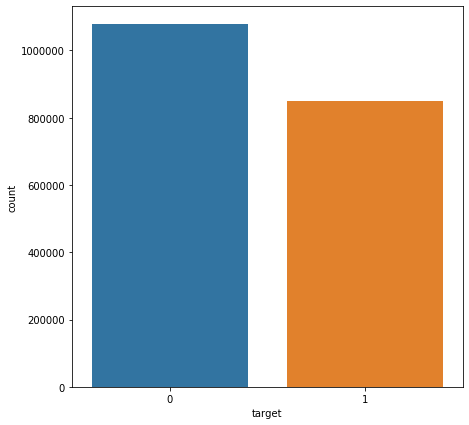

In [34]:
plt.figure(figsize=(7,7))
sns.countplot(data_trans['target'])

# Relation of numerical features to target

In [35]:
num_feature

['DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'Distance',
 'TaxiIn',
 'TaxiOut']

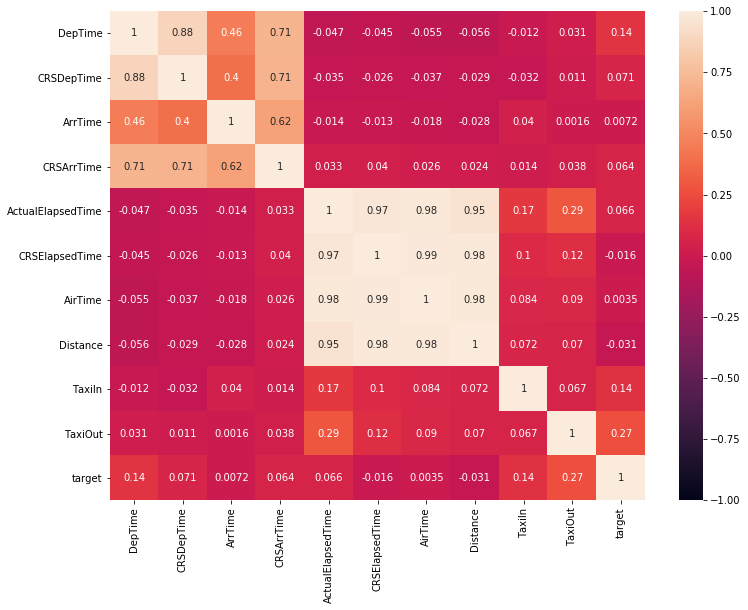

In [36]:
#correlation matrix
corrmat = data_trans[num_feature + ['target']].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1.0, vmin=-1.0, annot = True);
plt.show()

- Nhan xet: cac feature Distance, ActualElapsedTime, CRSElapsedTime, AirTime co he so tuong quan rat cao (>=0.95) nen ta chi chon 1 feature dai dien de build model => chon Distance

In [37]:
# update lai num_feature
num_feature.remove('ActualElapsedTime') 
num_feature.remove('CRSElapsedTime') 
num_feature.remove('AirTime') 
num_feature

['DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'Distance',
 'TaxiIn',
 'TaxiOut']

In [38]:
data_trans.drop(['ActualElapsedTime','CRSElapsedTime','AirTime'], axis = 1, inplace = True)

# Relation of Categorical features to target

Cac feature nhu TailNum, Origin, Dest, FlightNum co rat nhieu gia tri nen ta se kho visualize, do do ta nhom cac gia tri nay thanh tung nhom khac nhau de ve bieu do xem xet su lien he cua chung voi target

In [39]:
#FlightNum
# phan loai FlightNum thanh cac nhom co so luong chuyen bay khac nhau, voi khoang phan loai la <1000, >1000, >2000, >3000, >4000
FlightNum_frame = data_trans['FlightNum'].value_counts().to_frame()
FlightNum_lower100 = list(FlightNum_frame[FlightNum_frame['FlightNum'] < 100].index)
FlightNum_upper100 = list(FlightNum_frame[(FlightNum_frame['FlightNum'] >= 100) & (FlightNum_frame['FlightNum'] < 200)].index)
FlightNum_upper200 = list(FlightNum_frame[(FlightNum_frame['FlightNum'] >= 200) & (FlightNum_frame['FlightNum'] < 300)].index)
FlightNum_upper300 = list(FlightNum_frame[(FlightNum_frame['FlightNum'] >= 300) & (FlightNum_frame['FlightNum'] < 400)].index)
FlightNum_upper400 = list(FlightNum_frame[(FlightNum_frame['FlightNum'] >= 400) & (FlightNum_frame['FlightNum'] < 500)].index)
FlightNum_upper500 = list(FlightNum_frame[(FlightNum_frame['FlightNum'] >= 500) & (FlightNum_frame['FlightNum'] < 600)].index)
FlightNum_upper600 = list(FlightNum_frame[(FlightNum_frame['FlightNum'] >= 600) & (FlightNum_frame['FlightNum'] < 700)].index)
FlightNum_upper700 = list(FlightNum_frame[(FlightNum_frame['FlightNum'] >= 700) & (FlightNum_frame['FlightNum'] < 800)].index)
FlightNum_upper800 = list(FlightNum_frame[(FlightNum_frame['FlightNum'] >= 800) & (FlightNum_frame['FlightNum'] < 900)].index)
FlightNum_upper900 = list(FlightNum_frame[(FlightNum_frame['FlightNum'] > 900)].index)

data_trans['FlightNum_level'] = 1
data_trans.loc[(data_trans['FlightNum'].isin(FlightNum_upper100)), 'FlightNum_level'] = 2
data_trans.loc[(data_trans['FlightNum'].isin(FlightNum_upper200)), 'FlightNum_level'] = 3
data_trans.loc[(data_trans['FlightNum'].isin(FlightNum_upper300)), 'FlightNum_level'] = 4
data_trans.loc[(data_trans['FlightNum'].isin(FlightNum_upper400)), 'FlightNum_level'] = 5
data_trans.loc[(data_trans['FlightNum'].isin(FlightNum_upper500)), 'FlightNum_level'] = 6
data_trans.loc[(data_trans['FlightNum'].isin(FlightNum_upper600)), 'FlightNum_level'] = 7
data_trans.loc[(data_trans['FlightNum'].isin(FlightNum_upper700)), 'FlightNum_level'] = 8
data_trans.loc[(data_trans['FlightNum'].isin(FlightNum_upper800)), 'FlightNum_level'] = 9  
data_trans.loc[(data_trans['FlightNum'].isin(FlightNum_upper900)), 'FlightNum_level'] = 10   
data_trans['FlightNum_level'].value_counts()

2     300282
3     276186
10    231545
6     183987
7     182353
5     180724
4     171494
8     168743
1     117652
9     115402
Name: FlightNum_level, dtype: int64

In [40]:
#TailNum
# phan loai TailNum thanh cac nhom co so luong chuyen bay khac nhau, voi khoang phan loai la <1000, >1000, >2000, >3000, >4000
TailNum_frame = data_trans['TailNum'].value_counts().to_frame()
TailNum_lower100 = list(TailNum_frame[TailNum_frame['TailNum'] < 100].index)
TailNum_upper100 = list(TailNum_frame[(TailNum_frame['TailNum'] >= 100) & (TailNum_frame['TailNum'] < 200)].index)
TailNum_upper200 = list(TailNum_frame[(TailNum_frame['TailNum'] >= 200) & (TailNum_frame['TailNum'] < 300)].index)
TailNum_upper300 = list(TailNum_frame[(TailNum_frame['TailNum'] >= 300) & (TailNum_frame['TailNum'] < 400)].index)
TailNum_upper400 = list(TailNum_frame[(TailNum_frame['TailNum'] >= 400) & (TailNum_frame['TailNum'] < 500)].index)
TailNum_upper500 = list(TailNum_frame[(TailNum_frame['TailNum'] >= 500) & (TailNum_frame['TailNum'] < 600)].index)
TailNum_upper600 = list(TailNum_frame[(TailNum_frame['TailNum'] >= 600) & (TailNum_frame['TailNum'] < 700)].index)
TailNum_upper700 = list(TailNum_frame[(TailNum_frame['TailNum'] >= 700) & (TailNum_frame['TailNum'] < 800)].index)
TailNum_upper800 = list(TailNum_frame[(TailNum_frame['TailNum'] >= 800) & (TailNum_frame['TailNum'] < 900)].index)
TailNum_upper900 = list(TailNum_frame[(TailNum_frame['TailNum'] > 900)].index)

data_trans['TailNum_level'] = 1
data_trans.loc[(data_trans['TailNum'].isin(TailNum_upper100)), 'TailNum_level'] = 2
data_trans.loc[(data_trans['TailNum'].isin(TailNum_upper200)), 'TailNum_level'] = 3
data_trans.loc[(data_trans['TailNum'].isin(TailNum_upper300)), 'TailNum_level'] = 4
data_trans.loc[(data_trans['TailNum'].isin(TailNum_upper400)), 'TailNum_level'] = 5
data_trans.loc[(data_trans['TailNum'].isin(TailNum_upper500)), 'TailNum_level'] = 6
data_trans.loc[(data_trans['TailNum'].isin(TailNum_upper600)), 'TailNum_level'] = 7
data_trans.loc[(data_trans['TailNum'].isin(TailNum_upper700)), 'TailNum_level'] = 8
data_trans.loc[(data_trans['TailNum'].isin(TailNum_upper800)), 'TailNum_level'] = 9  
data_trans.loc[(data_trans['TailNum'].isin(TailNum_upper900)), 'TailNum_level'] = 10   
data_trans['TailNum_level'].value_counts()

4     511266
5     396853
3     246923
6     245111
7     229619
8     125557
9      77446
2      65909
1      21309
10      8375
Name: TailNum_level, dtype: int64

In [41]:
#Origin
# phan loai Origin thanh cac nhom co so luong chuyen bay khac nhau, voi khoang phan loai la <1000, >1000, >2000, >3000, >4000
Origin_frame = data_trans['Origin'].value_counts().to_frame()
Origin_lower10k = list(Origin_frame[Origin_frame['Origin'] < 10000].index)
Origin_upper10k = list(Origin_frame[(Origin_frame['Origin'] >= 10000) & (Origin_frame['Origin'] < 20000)].index)
Origin_upper20k = list(Origin_frame[(Origin_frame['Origin'] >= 20000) & (Origin_frame['Origin'] < 30000)].index)
Origin_upper30k = list(Origin_frame[(Origin_frame['Origin'] >= 30000) & (Origin_frame['Origin'] < 40000)].index)
Origin_upper40k = list(Origin_frame[(Origin_frame['Origin'] >= 40000) & (Origin_frame['Origin'] < 50000)].index)
Origin_upper50k = list(Origin_frame[(Origin_frame['Origin'] >= 50000) & (Origin_frame['Origin'] < 60000)].index)
Origin_upper60k = list(Origin_frame[(Origin_frame['Origin'] >= 60000) & (Origin_frame['Origin'] < 90000)].index)
# Origin_upper70k = list(Origin_frame[(Origin_frame['Origin'] >= 70000) & (Origin_frame['Origin'] < 80000)].index)
# Origin_upper80k = list(Origin_frame[(Origin_frame['Origin'] >= 80000) & (Origin_frame['Origin'] < 90000)].index)
Origin_upper90k = list(Origin_frame[(Origin_frame['Origin'] > 90000)].index)

data_trans['Origin_level'] = 1
data_trans.loc[(data_trans['Origin'].isin(Origin_upper10k)), 'Origin_level'] = 2
data_trans.loc[(data_trans['Origin'].isin(Origin_upper20k)), 'Origin_level'] = 3
data_trans.loc[(data_trans['Origin'].isin(Origin_upper30k)), 'Origin_level'] = 4
data_trans.loc[(data_trans['Origin'].isin(Origin_upper40k)), 'Origin_level'] = 5
data_trans.loc[(data_trans['Origin'].isin(Origin_upper50k)), 'Origin_level'] = 6
data_trans.loc[(data_trans['Origin'].isin(Origin_upper60k)), 'Origin_level'] = 7
# data_trans.loc[(data_trans['Origin'].isin(Origin_upper70k)), 'Origin_level'] = 8
# data_trans.loc[(data_trans['Origin'].isin(Origin_upper80k)), 'Origin_level'] = 9  
data_trans.loc[(data_trans['Origin'].isin(Origin_upper90k)), 'Origin_level'] = 8   
data_trans['Origin_level'].value_counts()

1    368883
8    351722
2    309511
6    276914
4    260453
3    199496
5     87356
7     74033
Name: Origin_level, dtype: int64

In [42]:
#Dest
# phan loai Dest thanh cac nhom co so luong chuyen bay khac nhau, voi khoang phan loai la <1000, >1000, >2000, >3000, >4000
Dest_frame = data_trans['Dest'].value_counts().to_frame()
Dest_lower10k = list(Dest_frame[Dest_frame['Dest'] < 10000].index)
Dest_upper10k = list(Dest_frame[(Dest_frame['Dest'] >= 10000) & (Dest_frame['Dest'] < 20000)].index)
Dest_upper20k = list(Dest_frame[(Dest_frame['Dest'] >= 20000) & (Dest_frame['Dest'] < 30000)].index)
Dest_upper30k = list(Dest_frame[(Dest_frame['Dest'] >= 30000) & (Dest_frame['Dest'] < 40000)].index)
Dest_upper40k = list(Dest_frame[(Dest_frame['Dest'] >= 40000) & (Dest_frame['Dest'] < 50000)].index)
Dest_upper50k = list(Dest_frame[(Dest_frame['Dest'] >= 50000) & (Dest_frame['Dest'] < 60000)].index)
Dest_upper60k = list(Dest_frame[(Dest_frame['Dest'] >= 60000) & (Dest_frame['Dest'] < 70000)].index)
Dest_upper70k = list(Dest_frame[(Dest_frame['Dest'] >= 70000) & (Dest_frame['Dest'] < 80000)].index)
# Dest_upper80k = list(Dest_frame[(Dest_frame['Dest'] >= 80000) & (Dest_frame['Dest'] < 90000)].index)
Dest_upper80k = list(Dest_frame[(Dest_frame['Dest'] >= 80000)].index)

data_trans['Dest_level'] = 1
data_trans.loc[(data_trans['Dest'].isin(Dest_upper10k)), 'Dest_level'] = 2
data_trans.loc[(data_trans['Dest'].isin(Dest_upper20k)), 'Dest_level'] = 3
data_trans.loc[(data_trans['Dest'].isin(Dest_upper30k)), 'Dest_level'] = 4
data_trans.loc[(data_trans['Dest'].isin(Dest_upper40k)), 'Dest_level'] = 5
data_trans.loc[(data_trans['Dest'].isin(Dest_upper50k)), 'Dest_level'] = 6
data_trans.loc[(data_trans['Dest'].isin(Dest_upper60k)), 'Dest_level'] = 7
data_trans.loc[(data_trans['Dest'].isin(Dest_upper70k)), 'Dest_level'] = 8
data_trans.loc[(data_trans['Dest'].isin(Dest_upper80k)), 'Dest_level'] = 9  
# data_trans.loc[(data_trans['Dest'].isin(Dest_upper90k)), 'Dest_level'] = 10   
data_trans['Dest_level'].value_counts()

1    415351
2    374773
3    250460
4    237929
9    214805
5    186684
6    115335
8     70181
7     62850
Name: Dest_level, dtype: int64

In [43]:
cat_feature

['Month',
 'DayofMonth',
 'DayOfWeek',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'Origin',
 'Dest']

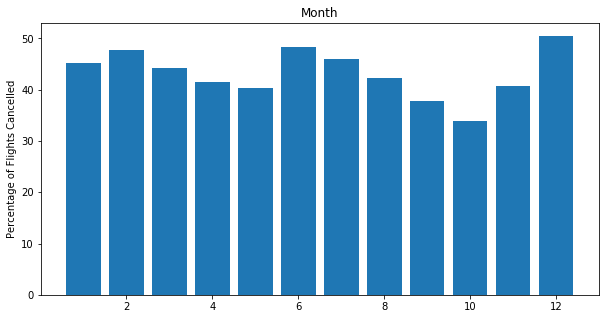

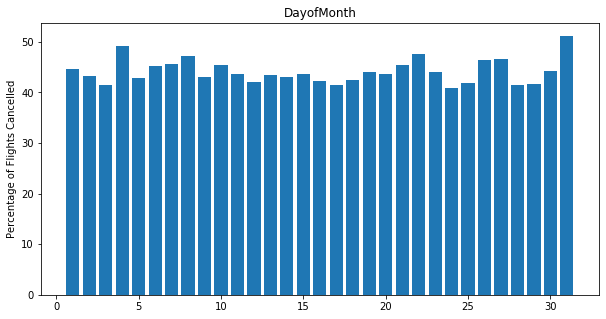

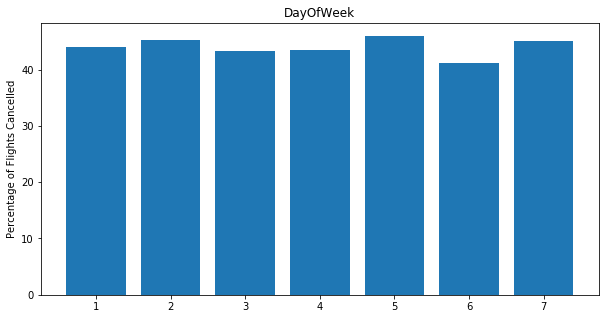

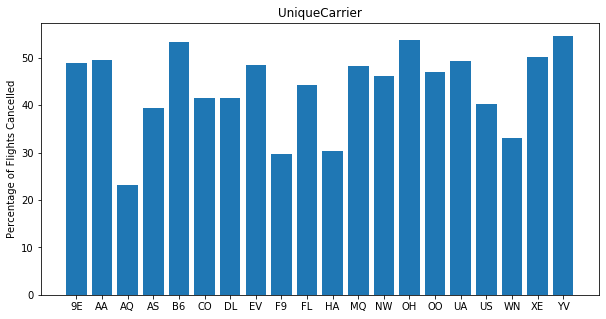

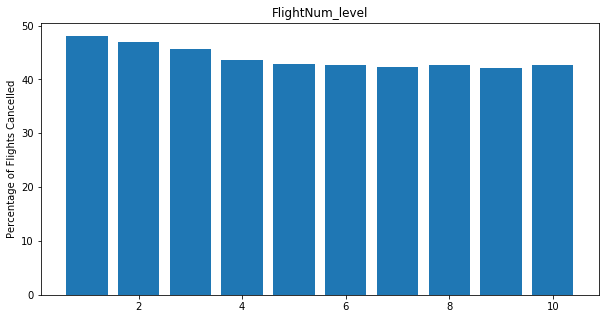

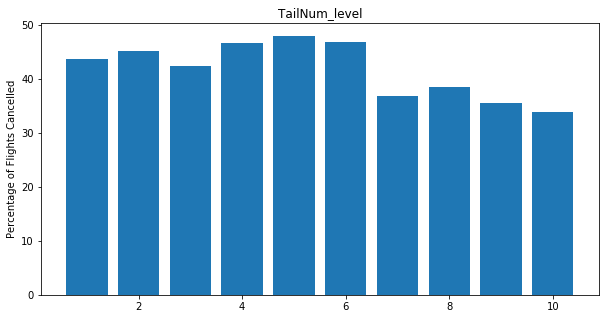

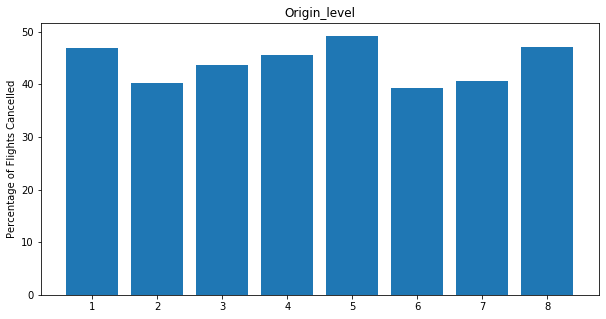

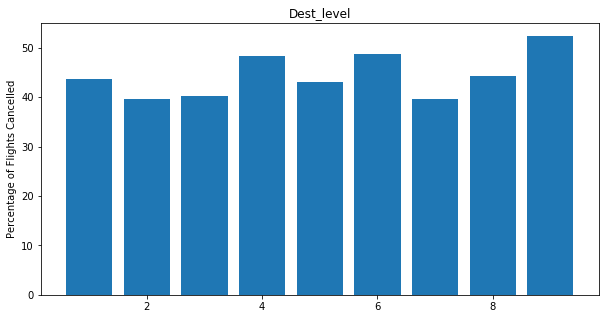

In [44]:
list_plot = ['Month','DayofMonth','DayOfWeek','UniqueCarrier', 'FlightNum_level', 'TailNum_level', 'Origin_level', 'Dest_level']
late_flight = data_trans[data_trans['target']==1]
for i in list_plot:
    plt.figure(figsize=(10,5))
    late = late_flight['target'].groupby(data_trans[i]).count()
    total = data_trans['target'].groupby(data_trans[i]).count()
    freq = np.divide(late,total)
    plt.bar(freq.index,freq*100, align='center')
    plt.ylabel('Percentage of Flights Cancelled')
    plt.title(i)

# Xu ly outlier

In [45]:
dataset = data_trans.drop(['FlightNum_level','TailNum_level','Origin_level','Dest_level'], axis = 1)
dataset.shape

(1928368, 16)

In [46]:
dataset.describe()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,Distance,TaxiIn,TaxiOut,target
count,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06
mean,6.107858e+00,1.575206e+01,3.984999e+00,1.518648e+03,1.467717e+03,1.610242e+03,1.634196e+03,2.184292e+03,7.649490e+02,6.811386e+00,1.821731e+01,4.413177e-01
std,3.480755e+00,8.776564e+00,1.996051e+00,4.504355e+02,4.247283e+02,5.480012e+02,4.646287e+02,1.944448e+03,5.738861e+02,5.268054e+00,1.430838e+01,4.965446e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.110000e+02,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00
50%,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.423000e+03,9.970000e+02,8.000000e+00,2.100000e+01,1.000000e+00
max,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,9.741000e+03,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00


In [47]:
q1 = dataset.quantile(0.25)
q3 = dataset.quantile(0.75)
iqr = q3 - q1
dataset = dataset[~((dataset < (q1 - 1.5 * iqr)) |(dataset > (q3 + 1.5 * iqr)))]
total = dataset.isnull().sum()
percent = dataset.isnull().sum()/len(dataset)*100
missing_dataset = pd.concat([total,percent], axis=1,keys=['Total', 'Percent'])
missing_dataset

,Total,Percent
Month,0,0.000000
DayofMonth,0,0.000000
DayOfWeek,0,0.000000
DepTime,16558,0.858654
CRSDepTime,2403,0.124613
ArrTime,95476,4.951130
CRSArrTime,25503,1.322517
UniqueCarrier,0,0.000000
FlightNum,6154,0.319130
TailNum,0,0.000000


In [48]:
dataset = pd.concat([dataset,data_trans[['FlightNum_level','TailNum_level','Origin_level','Dest_level']]], axis=1)

In [49]:
dataset.shape

(1928368, 20)

In [50]:
dataset = dataset.dropna()

In [51]:
dataset.shape

(1539221, 20)

In [52]:
dataset.isnull().sum()

Month              0
DayofMonth         0
DayOfWeek          0
DepTime            0
CRSDepTime         0
ArrTime            0
CRSArrTime         0
UniqueCarrier      0
FlightNum          0
TailNum            0
Origin             0
Dest               0
Distance           0
TaxiIn             0
TaxiOut            0
target             0
FlightNum_level    0
TailNum_level      0
Origin_level       0
Dest_level         0
dtype: int64

In [53]:
dataset.describe(percentiles=[.1,.25,.50,.75,.95,.99])

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,Distance,TaxiIn,TaxiOut,target,FlightNum_level,TailNum_level,Origin_level,Dest_level
count,1.539221e+06,1.539221e+06,1.539221e+06,1.539221e+06,1.539221e+06,1.539221e+06,1.539221e+06,1.539221e+06,1.539221e+06,1.539221e+06,1.539221e+06,1.539221e+06,1.539221e+06,1.539221e+06,1.539221e+06,1.539221e+06
mean,6.093900e+00,1.575112e+01,3.978118e+00,1.500450e+03,1.438534e+03,1.689237e+03,1.633413e+03,2.252663e+03,6.630659e+02,5.887774e+00,1.515925e+01,3.834719e-01,5.162251e+00,5.244986e+00,4.121379e+00,3.730030e+00
std,3.485377e+00,8.772446e+00,1.997265e+00,4.154984e+02,4.076245e+02,4.151136e+02,4.091349e+02,1.928080e+03,4.278661e+02,2.734986e+00,6.942001e+00,4.862318e-01,2.828293e+00,1.806840e+00,2.561788e+00,2.601680e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.580000e+02,1.150000e+02,2.450000e+02,3.040000e+02,1.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
10%,2.000000e+00,4.000000e+00,1.000000e+00,9.220000e+02,8.500000e+02,1.111000e+03,1.040000e+03,2.820000e+02,2.120000e+02,3.000000e+00,8.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00
25%,3.000000e+00,8.000000e+00,2.000000e+00,1.158000e+03,1.125000e+03,1.359000e+03,1.328000e+03,6.560000e+02,3.280000e+02,4.000000e+00,1.000000e+01,0.000000e+00,3.000000e+00,4.000000e+00,2.000000e+00,2.000000e+00
50%,6.000000e+00,1.600000e+01,4.000000e+00,1.527000e+03,1.450000e+03,1.726000e+03,1.650000e+03,1.616000e+03,5.750000e+02,5.000000e+00,1.400000e+01,0.000000e+00,5.000000e+00,5.000000e+00,4.000000e+00,3.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.837000e+03,1.753000e+03,2.032000e+03,1.955000e+03,3.570000e+03,9.190000e+02,7.000000e+00,1.900000e+01,1.000000e+00,7.000000e+00,7.000000e+00,6.000000e+00,5.000000e+00
95%,1.200000e+01,2.900000e+01,7.000000e+00,2.126000e+03,2.045000e+03,2.309000e+03,2.234000e+03,6.037000e+03,1.587000e+03,1.100000e+01,3.000000e+01,1.000000e+00,1.000000e+01,9.000000e+00,8.000000e+00,9.000000e+00
99%,1.200000e+01,3.100000e+01,7.000000e+00,2.225000e+03,2.145000e+03,2.348000e+03,2.325000e+03,7.199000e+03,1.864000e+03,1.400000e+01,3.500000e+01,1.000000e+00,1.000000e+01,9.000000e+00,8.000000e+00,9.000000e+00


# 2. Models

In [54]:
scaler = StandardScaler()

In [55]:
# label encoder
dataset['Dest'] = dataset['Dest'].astype('category').cat.codes
dataset['Origin']= dataset['Origin'].astype('category').cat.codes
dataset['TailNum']= dataset['TailNum'].astype('category').cat.codes
dataset['UniqueCarrier']= dataset['UniqueCarrier'].astype('category').cat.codes

In [56]:
# Split
# Create features variable 
X = dataset.drop(['target', 'TailNum_level', 'Origin_level', 'FlightNum_level', 'Dest_level'],axis = 1)
# Create target variable
y = dataset['target']

In [57]:
X.shape

(1539221, 15)

In [286]:
X.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut'],
      dtype='object')

In [58]:
# # Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [59]:
# X_train_tf = scaler.fit_transform(X_train)
X_train_tf = X_train
# X_test_tf = scaler.fit_transform(X_test)
X_test_tf = X_test

### 2.1 Logistic regression

In [60]:
# # Logistic regression
lr = LogisticRegression(n_jobs=8, solver = 'lbfgs')
lr.fit(X_train_tf,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=8, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
y_pred = lr.predict(X_test_tf)

In [62]:
clf_report_lr = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_lr = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_lr))
gini_lr = 2*auc_lr - 1
print('gini: ' + str(gini_lr))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92    189764
           1       0.90      0.84      0.87    118081

    accuracy                           0.90    307845
   macro avg       0.90      0.89      0.90    307845
weighted avg       0.90      0.90      0.90    307845

auc: 0.8917118990545532
gini: 0.7834237981091063


#### Making the Confusion Matrix

In [63]:
cm_lr = confusion_matrix(y_test, y_pred)
print(cm_lr)
accuracy_score(y_test, y_pred)

[[179224  10540]
 [ 19015  99066]]


0.9039938930305835

### 2.2 Naives Bayes

In [64]:
# Naives Bayes
nb = GaussianNB()

In [65]:
nb.fit(X_train_tf, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [66]:
y_pred = nb.predict(X_test_tf)

In [67]:
clf_report_nb = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_nb = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_nb))
gini_nb = 2*auc_nb - 1
print('gini: ' + str(gini_nb))

              precision    recall  f1-score   support

           0       0.68      0.80      0.73    189764
           1       0.54      0.38      0.45    118081

    accuracy                           0.64    307845
   macro avg       0.61      0.59      0.59    307845
weighted avg       0.62      0.64      0.62    307845

auc: 0.5910822312250015
gini: 0.18216446245000295


#### Making the Confusion Matrix

In [68]:
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)
accuracy_score(y_test, y_pred)

[[151725  38039]
 [ 72901  45180]]


0.6396238366710519

### 2.3 Decision tree

In [69]:
#decision tree
tree = DecisionTreeClassifier(max_depth=10)

In [70]:
tree.fit(X_train_tf,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [71]:
y_pred = tree.predict(X_test_tf)

In [72]:
clf_report_tree = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_tree = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_tree))
gini_tree = 2*auc_tree - 1
print('gini: ' + str(gini_tree))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86    189764
           1       0.91      0.56      0.69    118081

    accuracy                           0.81    307845
   macro avg       0.84      0.76      0.78    307845
weighted avg       0.83      0.81      0.80    307845

auc: 0.7619180526728676
gini: 0.5238361053457352


#### Making the Confusion Matrix

In [73]:
cm_tree = confusion_matrix(y_test, y_pred)
print(cm_tree)
accuracy_score(y_test, y_pred)

[[183090   6674]
 [ 52073  66008]]


0.8091669509006155

### 2.4 RandomForest

In [74]:
#RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=8)
rf.fit(X_train_tf,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=8,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [75]:
y_pred = rf.predict(X_test_tf)

In [76]:
clf_report_rf = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_rf = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_rf))
gini_rf = 2*auc_rf - 1
print('gini: ' + str(gini_rf))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    189764
           1       0.98      0.92      0.95    118081

    accuracy                           0.96    307845
   macro avg       0.97      0.95      0.96    307845
weighted avg       0.96      0.96      0.96    307845

auc: 0.9527661796674661
gini: 0.9055323593349323


#### Making the Confusion Matrix

In [77]:
cm_rf = confusion_matrix(y_test, y_pred)
print(cm_rf)
accuracy_score(y_test, y_pred)

[[187884   1880]
 [  9985 108096]]


0.9614578765287726

In [ ]:
### Tune RandomForest

In [78]:
# params = {'copy_X':(True, False),'fit_intercept': (True, False)}
#
# tune = GridSearchCV(estimator=rf, param_grid=params,)
# tune.fit(X_train, y_train)

# best_params = tune.best_params_
# score = tune.best_score_
# print('Config params: ', best_params)
# print('Score: %2.4f' % score)

### 2.5 GradientBoosting

In [79]:
# GradientBoosting
gbc = GradientBoostingClassifier(n_estimators=100,max_depth=3,learning_rate=1.0)
gbc.fit(X_train_tf,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [80]:
y_pred = gbc.predict(X_test_tf)

In [81]:
clf_report_gbc = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_gbc = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_gbc))
gini_gbc = 2*auc_gbc - 1
print('gini: ' + str(gini_gbc))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98    189764
           1       0.97      0.96      0.96    118081

    accuracy                           0.97    307845
   macro avg       0.97      0.97      0.97    307845
weighted avg       0.97      0.97      0.97    307845

auc: 0.9694922713439189
gini: 0.9389845426878378


#### Making the Confusion Matrix

In [82]:
cm_gbc = confusion_matrix(y_test, y_pred)
print(cm_gbc)
accuracy_score(y_test, y_pred)

[[186404   3360]
 [  5114 112967]]


0.9724731601942536

### 2.6 SVM

In [83]:
# lay 1/10 du lieu de buil model svm
# data_svm = dataset.sample(frac = 0.1, random_state = 1)
# data_svm.shape

In [84]:
# X_svm = data_svm.drop(['target', 'TailNum_level', 'Origin_level', 'FlightNum_level', 'Dest_level'],axis = 1)
# y_svm = data_svm['target']

In [85]:
# # Train, test, split
# X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X_svm,y_svm, test_size = .20, random_state= 0)

In [86]:
#SVM
# svm = SVC(gamma = 1)
# svm.fit(X_svm_train,y_svm_train)

In [87]:
# y_pred = svm.predict(X_svm_test)

In [88]:
# clf_report_svm = classification_report(y_svm_test, y_pred, output_dict = True)
# print(classification_report(y_svm_test, y_pred))
# auc_svm = roc_auc_score(y_svm_test, y_pred)
# print('auc: '+ str(auc_svm))
# gini_svm = 2*auc_svm - 1
# print('gini: ' + str(gini_svm))

#### Making the Confusion Matrix

In [89]:
# cm_svm = confusion_matrix(y_svm_test, y_pred)
# print(cm_svm)
# accuracy_score(y_svm_test, y_pred)

### 2.7 KNN

In [90]:
neigh = KNeighborsClassifier(n_neighbors=5, n_jobs=8)

In [91]:
neigh.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=8, n_neighbors=5, p=2,
                     weights='uniform')

In [92]:
y_pred = neigh.predict(X_test_tf)

In [93]:
clf_report_neigh = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_neigh = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_neigh))
gini_neigh = 2*auc_neigh - 1
print('gini: ' + str(gini_neigh))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86    189764
           1       0.83      0.64      0.72    118081

    accuracy                           0.81    307845
   macro avg       0.82      0.78      0.79    307845
weighted avg       0.82      0.81      0.81    307845

auc: 0.7799438986617795
gini: 0.559887797323559


#### Making the Confusion Matrix

In [94]:
cm_knn = confusion_matrix(y_test, y_pred)
print(cm_knn)
accuracy_score(y_test, y_pred)

[[174759  15005]
 [ 42632  75449]]


0.8127726615666975

### 2.8 XGBoost

In [95]:
xgb = XGBClassifier(nthread = 8)

In [96]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=8, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [97]:
y_pred = xgb.predict(X_test)

In [98]:
clf_report_xgb = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_xgb = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_xgb))
gini_xgb = 2*auc_xgb - 1
print('gini: ' + str(gini_xgb))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91    189764
           1       0.99      0.69      0.81    118081

    accuracy                           0.88    307845
   macro avg       0.91      0.84      0.86    307845
weighted avg       0.89      0.88      0.87    307845

auc: 0.8407460915035788
gini: 0.6814921830071576


#### Making the Confusion Matrix

In [99]:
cm_xgb = confusion_matrix(y_test, y_pred)
print(cm_xgb)
accuracy_score(y_test, y_pred)

[[188662   1102]
 [ 36924  81157]]


0.8764767983887995

### 2.9 LightGBM

In [100]:
lgbm = LGBMClassifier()

In [101]:
lgbm.fit(X_train_tf,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [102]:
y_pred = lgbm.predict(X_test_tf)

In [103]:
clf_report_lgbm = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_lgbm = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_lgbm))
gini_lgbm = 2*auc_lgbm - 1
print('gini: ' + str(gini_lgbm))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    189764
           1       0.98      0.93      0.96    118081

    accuracy                           0.97    307845
   macro avg       0.97      0.96      0.96    307845
weighted avg       0.97      0.97      0.97    307845

auc: 0.9600016148531985
gini: 0.9200032297063969


#### Making the Confusion Matrix

In [104]:
cm_lgbm = confusion_matrix(y_test, y_pred)
print(cm_lgbm)
accuracy_score(y_test, y_pred)

[[187935   1829]
 [  8308 109773]]


0.9670710909711056

### 2.10 Summary

In [105]:
summary = {'Logistic Regression':[auc_lr , gini_lr, clf_report_lr['0']['precision'], clf_report_lr['1']['precision'], clf_report_lr['0']['recall'], clf_report_lr['1']['recall'], clf_report_lr['0']['f1-score'], clf_report_lr['1']['f1-score']],
          'Naive Bayes':[auc_nb , gini_nb, clf_report_nb['0']['precision'], clf_report_nb['1']['precision'], clf_report_nb['0']['recall'], clf_report_nb['1']['recall'], clf_report_nb['0']['f1-score'], clf_report_nb['1']['f1-score']],
          'Decision tree':[auc_tree , gini_tree, clf_report_tree['0']['precision'], clf_report_tree['1']['precision'], clf_report_tree['0']['recall'], clf_report_tree['1']['recall'], clf_report_tree['0']['f1-score'], clf_report_tree['1']['f1-score']],
          'Random Forest':[auc_rf , gini_rf, clf_report_rf['0']['precision'], clf_report_rf['1']['precision'], clf_report_rf['0']['recall'], clf_report_rf['1']['recall'], clf_report_rf['0']['f1-score'], clf_report_rf['1']['f1-score']],
          'Gradientboosting':[auc_gbc , gini_gbc, clf_report_gbc['0']['precision'], clf_report_gbc['1']['precision'], clf_report_gbc['0']['recall'], clf_report_gbc['1']['recall'], clf_report_gbc['0']['f1-score'], clf_report_gbc['1']['f1-score']],
#           'SVM':[auc_svm , gini_svm, clf_report_svm['0']['precision'], clf_report_svm['1']['precision'], clf_report_svm['0']['recall'], clf_report_svm['1']['recall'], clf_report_svm['0']['f1-score'], clf_report_svm['1']['f1-score']],
          'KNN':[auc_neigh , gini_neigh, clf_report_neigh['0']['precision'], clf_report_neigh['1']['precision'], clf_report_neigh['0']['recall'], clf_report_neigh['1']['recall'], clf_report_neigh['0']['f1-score'], clf_report_neigh['1']['f1-score']],
          'XGBoost':[auc_xgb , gini_xgb, clf_report_xgb['0']['precision'], clf_report_xgb['1']['precision'], clf_report_xgb['0']['recall'], clf_report_xgb['1']['recall'], clf_report_xgb['0']['f1-score'], clf_report_xgb['1']['f1-score']],
          'LightGBM':[auc_lgbm , gini_lgbm, clf_report_lgbm['0']['precision'], clf_report_lgbm['1']['precision'], clf_report_lgbm['0']['recall'], clf_report_lgbm['1']['recall'], clf_report_lgbm['0']['f1-score'], clf_report_lgbm['1']['f1-score']]
          }

In [106]:
df_sum = pd.DataFrame(data=summary,index = ['auc', 'gini', 'precision_0', 'precision_1', 'recall_0', 'recall_1', 'f1-score_0','f1-score_1'])
df_sum

,Logistic Regression,Naive Bayes,Decision tree,Random Forest,Gradientboosting,KNN,XGBoost,LightGBM
auc,0.891712,0.591082,0.761918,0.952766,0.969492,0.779944,0.840746,0.960002
gini,0.783424,0.182164,0.523836,0.905532,0.938985,0.559888,0.681492,0.920003
precision_0,0.904080,0.675456,0.778566,0.949537,0.973298,0.803893,0.836320,0.957665
precision_1,0.903837,0.542905,0.908175,0.982905,0.971116,0.834115,0.986603,0.983611
recall_0,0.944457,0.799546,0.964830,0.990093,0.982294,0.920928,0.994193,0.990362
recall_1,0.838966,0.382619,0.559006,0.915439,0.956691,0.638960,0.687299,0.929642
f1-score_0,0.923828,0.732281,0.861748,0.969391,0.977775,0.858440,0.908448,0.973739
f1-score_1,0.870195,0.448882,0.692042,0.947974,0.963849,0.723610,0.810193,0.955865


# 3. Apply PCA, SelectKBest and RFE for feature selections

## 3.1 PCA

Step 1. Data Standardization
- As PCA deals with variance maximization of two variables, it is important to have both variables on same scale.

In [107]:
Xstd = scaler.fit_transform(X)

Step 2: Eigen Decomposition of Covariance Matrix

In [108]:
cov_mat = np.cov(Xstd.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)

Now, Making list of eigen values and vectors and sorting the list w.r.t eigen values (Descending order) where highest eigen values represent highest variation.

In [109]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs.sort()
pairs.reverse()

To check how much each Principle component represent variation, let us find the cumulative sum of eigen values and plot them.

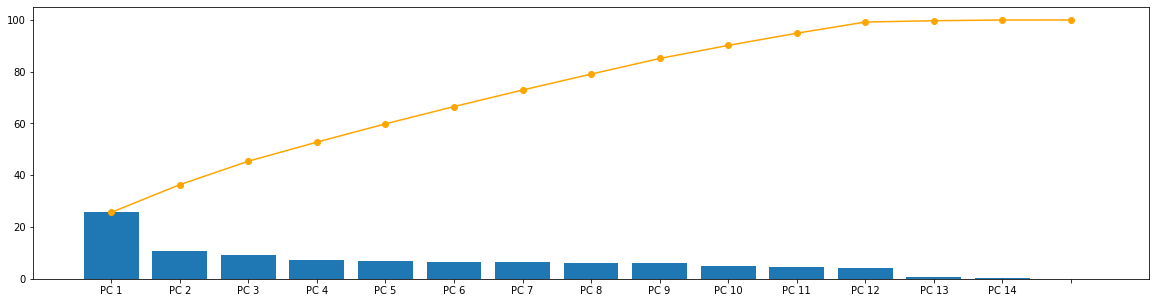

In [110]:
tot = sum(eigen_values)
var_per = [(i / tot)*100 for i in sorted(eigen_values, reverse=True)]
cum_var_per = np.cumsum(var_per)

plt.figure(figsize=(20,5))
x=['PC %s' %i for i in range(1,len(var_per))]
ind = np.arange(len(var_per)) 
plt.bar(ind,var_per)
plt.xticks(ind,x);
plt.plot(ind,cum_var_per,marker="o",color='orange')
plt.xticks(ind,x);

The graph shows that first 12 components carry 100% information.

Step 3: Projection Onto New Feature Space
- Reshaping eigen pairs to form a projection matrix, which is then multiplied by samples to transform data to new feature space

In [111]:
N=15
value=12
a = np.ndarray(shape = (N, 0))
for x in range(0,value):
    b = pairs[x][1].reshape(N,1)
    a = np.hstack((a,b))

In [112]:
sklearn_pca = PCA(n_components=value)
reduced_data = sklearn_pca.fit_transform(Xstd)

In [113]:
# # Train, test, split
X_pca_train, X_pca_test, y_train, y_test = train_test_split(reduced_data,y, test_size = .20, random_state= 0)

### 3.1.1 Logistic regression

In [114]:
lr.fit(X_pca_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=8, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
y_pred = lr.predict(X_pca_test)

In [116]:
clf_report_lr = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_lr = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_lr))
gini_lr = 2*auc_lr - 1
print('gini: ' + str(gini_lr))

              precision    recall  f1-score   support

           0       0.65      0.89      0.75    189764
           1       0.58      0.24      0.34    118081

    accuracy                           0.64    307845
   macro avg       0.62      0.56      0.54    307845
weighted avg       0.62      0.64      0.59    307845

auc: 0.5644572514095842
gini: 0.1289145028191685


#### Making the Confusion Matrix

In [117]:
cm_lr = confusion_matrix(y_test, y_pred)
print(cm_lr)
accuracy_score(y_test, y_pred)

[[169440  20324]
 [ 90212  27869]]


0.6409361854179864

### 3.1.2 Naives Bayes

In [118]:
# Fit model to training data
nb.fit(X_pca_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [119]:
# Predict
y_pred = nb.predict(X_pca_test)

In [120]:
clf_report_nb = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_nb = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_nb))
gini_nb = 2*auc_nb - 1
print('gini: ' + str(gini_nb))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75    189764
           1       0.57      0.26      0.36    118081

    accuracy                           0.64    307845
   macro avg       0.61      0.57      0.55    307845
weighted avg       0.62      0.64      0.60    307845

auc: 0.5691885109311666
gini: 0.13837702186233325


#### Making the Confusion Matrix

In [121]:
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)
accuracy_score(y_test, y_pred)

[[166040  23724]
 [ 86979  31102]]


0.6403937046240803

### 3.1.3 Decision Tree

In [122]:
# tree = DecisionTreeClassifier(max_depth=10)
# Fit model to training data
tree.fit(X_pca_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [123]:
# Predict
y_pred = tree.predict(X_pca_test)

In [124]:
clf_report_tree = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_tree = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_tree))
gini_tree = 2*auc_tree - 1
print('gini: ' + str(gini_tree))

              precision    recall  f1-score   support

           0       0.65      0.89      0.75    189764
           1       0.57      0.24      0.33    118081

    accuracy                           0.64    307845
   macro avg       0.61      0.56      0.54    307845
weighted avg       0.62      0.64      0.59    307845

auc: 0.5624800998864395
gini: 0.12496019977287909


#### Making the Confusion Matrix

In [125]:
cm_tree = confusion_matrix(y_test, y_pred)
print(cm_tree)
accuracy_score(y_test, y_pred)

[[168868  20896]
 [ 90323  27758]]


0.6387175364225504

### 3.1.4 Random Forest

In [126]:
# rf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0, n_jobs = 8)
# Fit model to training data
rf.fit(X_pca_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=8,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [127]:
# Predict
y_pred = rf.predict(X_pca_test)

In [128]:
clf_report_rf = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_rf = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_rf))
gini_rf = 2*auc_rf - 1
print('gini: ' + str(gini_rf))

              precision    recall  f1-score   support

           0       0.68      0.88      0.76    189764
           1       0.63      0.32      0.43    118081

    accuracy                           0.67    307845
   macro avg       0.65      0.60      0.60    307845
weighted avg       0.66      0.67      0.63    307845

auc: 0.6013460119735742
gini: 0.20269202394714836


#### Making the Confusion Matrix

In [129]:
cm_rf = confusion_matrix(y_test, y_pred)
print(cm_rf)
accuracy_score(y_test, y_pred)

[[166857  22907]
 [ 79893  38188]]


0.6660657148889864

### 3.1.5 Gradient Boosting

In [130]:
# GradientBoosting
# gbc = GradientBoostingClassifier(n_estimators=100,max_depth=3,learning_rate=1.0)
gbc.fit(X_pca_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [131]:
# Predict
y_pred = gbc.predict(X_pca_test)

In [132]:
clf_report_gbc = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_gbc = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_gbc))
gini_gbc = 2*auc_gbc - 1
print('gini: ' + str(gini_gbc))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75    189764
           1       0.59      0.29      0.39    118081

    accuracy                           0.65    307845
   macro avg       0.63      0.58      0.57    307845
weighted avg       0.64      0.65      0.61    307845

auc: 0.5817469190808213
gini: 0.16349383816164265


#### Making the Confusion Matrix

In [133]:
cm_gbc = confusion_matrix(y_test, y_pred)
print(cm_gbc)
accuracy_score(y_test, y_pred)

[[165924  23840]
 [ 83941  34140]]


0.649885494323442

### 3.1.6 SVM

In [134]:
# svm = SVC(kernel='linear')
# svm.fit(X_pca_train,y_pca_train)

In [135]:
# Predict
# y_pred = svm.predict(X_pca_test)

In [136]:
# clf_report_svm = classification_report(y_test, y_pred, output_dict = True)
# print(classification_report(y_test, y_pred))
# auc_svm = roc_auc_score(y_test, y_pred)
# print('auc: '+ str(auc_svm))
# gini_svm = 2*auc_svm - 1
# print('gini: ' + str(gini_svm))

#### Making the Confusion Matrix

In [137]:
# cm_svm = confusion_matrix(y_test, y_pred)
# print(cm_svm)
# accuracy_score(y_test, y_pred)

### 3.1.7 KNN

In [138]:
# neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_pca_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=8, n_neighbors=5, p=2,
                     weights='uniform')

In [139]:
# Predict
y_pred = neigh.predict(X_pca_test)

In [140]:
clf_report_neigh = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_neigh = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_neigh))
gini_neigh = 2*auc_neigh - 1
print('gini: ' + str(gini_neigh))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71    189764
           1       0.51      0.41      0.45    118081

    accuracy                           0.63    307845
   macro avg       0.59      0.58      0.58    307845
weighted avg       0.61      0.63      0.61    307845

auc: 0.5839430042641208
gini: 0.16788600852824165


#### Making the Confusion Matrix

In [141]:
cm_neigh = confusion_matrix(y_test, y_pred)
print(cm_neigh)
accuracy_score(y_test, y_pred)

[[144498  45266]
 [ 70090  47991]]


0.6252789553184233

### 3.1.8 XGBoost

In [142]:
# xgb = XGBClassifier(nthread = -1)

In [143]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=8, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [144]:
y_pred = xgb.predict(X_test)

In [145]:
clf_report_xgb = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_xgb = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_xgb))
gini_xgb = 2*auc_xgb - 1
print('gini: ' + str(gini_xgb))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91    189764
           1       0.99      0.69      0.81    118081

    accuracy                           0.88    307845
   macro avg       0.91      0.84      0.86    307845
weighted avg       0.89      0.88      0.87    307845

auc: 0.8407460915035788
gini: 0.6814921830071576


#### Making the Confusion Matrix

In [146]:
cm_xgb = confusion_matrix(y_test, y_pred)
print(cm_xgb)
accuracy_score(y_test, y_pred)

[[188662   1102]
 [ 36924  81157]]


0.8764767983887995

### 3.1.9 LightGBM

In [147]:
# lgbm = LGBMClassifier()

In [148]:
lgbm.fit(X_train_tf,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [149]:
y_pred = lgbm.predict(X_test_tf)

In [150]:
clf_report_lgbm = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_lgbm = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_lgbm))
gini_lgbm = 2*auc_lgbm - 1
print('gini: ' + str(gini_lgbm))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    189764
           1       0.98      0.93      0.96    118081

    accuracy                           0.97    307845
   macro avg       0.97      0.96      0.96    307845
weighted avg       0.97      0.97      0.97    307845

auc: 0.9600016148531985
gini: 0.9200032297063969


#### Making the Confusion Matrix

In [151]:
cm_lgbm = confusion_matrix(y_test, y_pred)
print(cm_lgbm)
accuracy_score(y_test, y_pred)

[[187935   1829]
 [  8308 109773]]


0.9670710909711056

### 3.1.10 Summary

In [152]:
summary_pca = {'Logistic Regression':[auc_lr , gini_lr, clf_report_lr['0']['precision'], clf_report_lr['1']['precision'], clf_report_lr['0']['recall'], clf_report_lr['1']['recall'], clf_report_lr['0']['f1-score'], clf_report_lr['1']['f1-score']],
          'Naive Bayes':[auc_nb , gini_nb, clf_report_nb['0']['precision'], clf_report_nb['1']['precision'], clf_report_nb['0']['recall'], clf_report_nb['1']['recall'], clf_report_nb['0']['f1-score'], clf_report_nb['1']['f1-score']],
          'Decision tree':[auc_tree , gini_tree, clf_report_tree['0']['precision'], clf_report_tree['1']['precision'], clf_report_tree['0']['recall'], clf_report_tree['1']['recall'], clf_report_tree['0']['f1-score'], clf_report_tree['1']['f1-score']],
          'Random Forest':[auc_rf , gini_rf, clf_report_rf['0']['precision'], clf_report_rf['1']['precision'], clf_report_rf['0']['recall'], clf_report_rf['1']['recall'], clf_report_rf['0']['f1-score'], clf_report_rf['1']['f1-score']],
          'Gradientboosting':[auc_gbc , gini_gbc, clf_report_gbc['0']['precision'], clf_report_gbc['1']['precision'], clf_report_gbc['0']['recall'], clf_report_gbc['1']['recall'], clf_report_gbc['0']['f1-score'], clf_report_gbc['1']['f1-score']],
#           'SVM':[auc_svm , gini_svm, clf_report_svm['0']['precision'], clf_report_svm['1']['precision'], clf_report_svm['0']['recall'], clf_report_svm['1']['recall'], clf_report_svm['0']['f1-score'], clf_report_svm['1']['f1-score']],
          'KNN':[auc_neigh , gini_neigh, clf_report_neigh['0']['precision'], clf_report_neigh['1']['precision'], clf_report_neigh['0']['recall'], clf_report_neigh['1']['recall'], clf_report_neigh['0']['f1-score'], clf_report_neigh['1']['f1-score']],
          'XGBoost':[auc_xgb , gini_xgb, clf_report_xgb['0']['precision'], clf_report_xgb['1']['precision'], clf_report_xgb['0']['recall'], clf_report_xgb['1']['recall'], clf_report_xgb['0']['f1-score'], clf_report_xgb['1']['f1-score']],
          'LightGBM':[auc_lgbm , gini_lgbm, clf_report_lgbm['0']['precision'], clf_report_lgbm['1']['precision'], clf_report_lgbm['0']['recall'], clf_report_lgbm['1']['recall'], clf_report_lgbm['0']['f1-score'], clf_report_lgbm['1']['f1-score']]
          }

In [153]:
df_sum_pca = pd.DataFrame(data=summary_pca,index = ['auc', 'gini', 'precision_0', 'precision_1', 'recall_0', 'recall_1', 'f1-score_0','f1-score_1'])
df_sum_pca

,Logistic Regression,Naive Bayes,Decision tree,Random Forest,Gradientboosting,KNN,XGBoost,LightGBM
auc,0.564457,0.569189,0.562480,0.601346,0.581747,0.583943,0.840746,0.960002
gini,0.128915,0.138377,0.124960,0.202692,0.163494,0.167886,0.681492,0.920003
precision_0,0.652566,0.656235,0.651520,0.676219,0.664055,0.673374,0.836320,0.957665
precision_1,0.578279,0.567286,0.570518,0.625059,0.588824,0.514610,0.986603,0.983611
recall_0,0.892899,0.874982,0.889884,0.879287,0.874370,0.761462,0.994193,0.990362
recall_1,0.236016,0.263395,0.235076,0.323405,0.289124,0.406424,0.687299,0.929642
f1-score_0,0.754045,0.749984,0.752271,0.764498,0.754836,0.714714,0.908448,0.973739
f1-score_1,0.335218,0.359754,0.332959,0.426262,0.387820,0.454163,0.810193,0.955865


## 3.2 SelectKBest

In [154]:
# Create features variable 
# X = dataset.drop(['target', 'TailNum_level', 'Origin_level', 'FlightNum_level', 'Dest_level'],axis = 1)

In [155]:
X.shape

(1539221, 15)

In [156]:
X_new = SelectKBest(f_classif, k=10).fit_transform(X, y)
X_new.shape

(1539221, 10)

In [157]:
X_new

array([[1.000e+00, 2.003e+03, 1.955e+03, ..., 8.100e+02, 4.000e+00,
        8.000e+00],
       [1.000e+00, 7.540e+02, 7.350e+02, ..., 8.100e+02, 5.000e+00,
        1.000e+01],
       [1.000e+00, 6.280e+02, 6.200e+02, ..., 5.150e+02, 3.000e+00,
        1.700e+01],
       ...,
       [1.200e+01, 1.007e+03, 8.470e+02, ..., 6.890e+02, 8.000e+00,
        3.200e+01],
       [1.200e+01, 1.251e+03, 1.240e+03, ..., 5.330e+02, 1.300e+01,
        1.300e+01],
       [1.200e+01, 1.110e+03, 1.103e+03, ..., 8.740e+02, 8.000e+00,
        1.100e+01]])

In [158]:
# X_new_s = scaler.fit_transform(X_new)

In [159]:
# Train, test, split
X_kbest_train, X_kbest_test, y_train, y_test = train_test_split(X_new,y, test_size = .20, random_state= 0)

In [160]:
X_kbest_train = scaler.fit_transform(X_kbest_train)
X_kbest_test = scaler.fit_transform(X_kbest_test)

### 3.2.1 Logistic Regression

In [161]:
lr.fit(X_kbest_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=8, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [162]:
y_pred = lr.predict(X_kbest_test)

In [163]:
clf_report_lr = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_lr = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_lr))
gini_lr = 2*auc_lr - 1
print('gini: ' + str(gini_lr))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93    189764
           1       0.92      0.84      0.88    118081

    accuracy                           0.91    307845
   macro avg       0.92      0.90      0.91    307845
weighted avg       0.91      0.91      0.91    307845

auc: 0.899883682809854
gini: 0.799767365619708


#### Making the Confusion Matrix

In [164]:
cm_lr = confusion_matrix(y_test, y_pred)
print(cm_lr)
accuracy_score(y_test, y_pred)

[[181411   8353]
 [ 18446  99635]]


0.9129464503240267

### 3.2.2 Naive Bayes

In [165]:
# Create Naives Bayes object
# nb = GaussianNB()

# Fit model to training data
nb.fit(X_kbest_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [166]:
# Predict
y_pred = nb.predict(X_kbest_test)

In [167]:
clf_report_nb = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_nb = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_nb))
gini_nb = 2*auc_nb - 1
print('gini: ' + str(gini_nb))

              precision    recall  f1-score   support

           0       0.68      0.80      0.73    189764
           1       0.54      0.38      0.45    118081

    accuracy                           0.64    307845
   macro avg       0.61      0.59      0.59    307845
weighted avg       0.62      0.64      0.62    307845

auc: 0.590866672725965
gini: 0.1817333454519301


#### Making the Confusion Matrix

In [168]:
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)
accuracy_score(y_test, y_pred)

[[151873  37891]
 [ 73044  45037]]


0.6396400786109893

### 3.2.3 Decision Tree

In [169]:
# tree = DecisionTreeClassifier(max_depth=10)
# Fit model to training data
tree.fit(X_kbest_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [170]:
# Predict
y_pred = tree.predict(X_kbest_test)

In [171]:
clf_report_tree = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_tree = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_tree))
gini_tree = 2*auc_tree - 1
print('gini: ' + str(gini_tree))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86    189764
           1       0.91      0.56      0.69    118081

    accuracy                           0.81    307845
   macro avg       0.84      0.76      0.78    307845
weighted avg       0.83      0.81      0.80    307845

auc: 0.7607676155123904
gini: 0.5215352310247807


#### Making the Confusion Matrix

In [172]:
cm_tree = confusion_matrix(y_test, y_pred)
print(cm_tree)
accuracy_score(y_test, y_pred)

[[183068   6696]
 [ 52331  65750]]


0.8082574022641265

### 3.2.4 Random Forest

In [173]:
# rf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
# Fit model to training data
rf.fit(X_kbest_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=8,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [174]:
# Predict
y_pred = rf.predict(X_kbest_test)

In [175]:
clf_report_rf = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_rf = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_rf))
gini_rf = 2*auc_rf - 1
print('gini: ' + str(gini_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    189764
           1       0.99      0.96      0.97    118081

    accuracy                           0.98    307845
   macro avg       0.98      0.97      0.98    307845
weighted avg       0.98      0.98      0.98    307845

auc: 0.974710750294285
gini: 0.94942150058857


#### Making the Confusion Matrix

In [176]:
cm_rf = confusion_matrix(y_test, y_pred)
print(cm_rf)
accuracy_score(y_test, y_pred)

[[188121   1643]
 [  4950 113131]]


0.9785833779986681

### 3.2.5 Gradient Boosting

In [177]:
# GradientBoosting
# gbc = GradientBoostingClassifier(n_estimators=100,max_depth=3,learning_rate=1.0)
gbc.fit(X_kbest_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [178]:
# Predict
y_pred = gbc.predict(X_kbest_test)

In [179]:
clf_report_gbc = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_gbc = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_gbc))
gini_gbc = 2*auc_gbc - 1
print('gini: ' + str(gini_gbc))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98    189764
           1       0.97      0.95      0.96    118081

    accuracy                           0.97    307845
   macro avg       0.97      0.97      0.97    307845
weighted avg       0.97      0.97      0.97    307845

auc: 0.9657191525151361
gini: 0.9314383050302721


#### Making the Confusion Matrix

In [180]:
cm_gbc = confusion_matrix(y_test, y_pred)
print(cm_gbc)
accuracy_score(y_test, y_pred)

[[186383   3381]
 [  5992 112089]]


0.969552859393526

### 3.2.6 SVM

In [181]:
# svm = SVC(kernel='linear')
# svm.fit(X_kbest_train,y_kbest_train)

In [182]:
# Predict
# y_pred = svm.predict(X_kbest_test)

In [183]:
# clf_report_svm = classification_report(y_test, y_pred, output_dict = True)
# print(classification_report(y_test, y_pred))
# auc_svm = roc_auc_score(y_test, y_pred)
# print('auc: '+ str(auc_svm))
# gini_svm = 2*auc_svm - 1
# print('gini: ' + str(gini_svm))

#### Making the Confusion Matrix

In [184]:
# cm_svm = confusion_matrix(y_test, y_pred)
# print(cm_svm)
# accuracy_score(y_test, y_pred)

### 3.2.7 KNN

In [185]:
# neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_kbest_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=8, n_neighbors=5, p=2,
                     weights='uniform')

In [186]:
# Predict
y_pred = neigh.predict(X_kbest_test)

In [187]:
clf_report_neigh = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_neigh = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_neigh))
gini_neigh = 2*auc_neigh - 1
print('gini: ' + str(gini_neigh))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82    189764
           1       0.75      0.56      0.64    118081

    accuracy                           0.76    307845
   macro avg       0.75      0.72      0.73    307845
weighted avg       0.76      0.76      0.75    307845

auc: 0.7199080108724791
gini: 0.43981602174495826


#### Making the Confusion Matrix

In [188]:
cm_neigh = confusion_matrix(y_test, y_pred)
print(cm_neigh)
accuracy_score(y_test, y_pred)

[[167416  22348]
 [ 52241  65840]]


0.7577059884032549

### 3.2.8 XGBoost

In [189]:
# xgb = XGBClassifier(nthread = -1)

In [190]:
xgb.fit(X_kbest_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=8, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [191]:
y_pred = xgb.predict(X_kbest_test)

In [192]:
clf_report_xgb = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_xgb = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_xgb))
gini_xgb = 2*auc_xgb - 1
print('gini: ' + str(gini_xgb))

              precision    recall  f1-score   support

           0       0.83      0.99      0.91    189764
           1       0.99      0.68      0.81    118081

    accuracy                           0.87    307845
   macro avg       0.91      0.84      0.86    307845
weighted avg       0.89      0.87      0.87    307845

auc: 0.8371908218777299
gini: 0.6743816437554597


#### Making the Confusion Matrix

In [193]:
cm_xgb = confusion_matrix(y_test, y_pred)
print(cm_xgb)
accuracy_score(y_test, y_pred)

[[188751   1013]
 [ 37819  80262]]


0.8738585976709058

### 3.2.9 LightGBM

In [194]:
# lgbm = LGBMClassifier()

In [195]:
lgbm.fit(X_kbest_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [196]:
y_pred = lgbm.predict(X_kbest_test)

In [197]:
clf_report_lgbm = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_lgbm = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_lgbm))
gini_lgbm = 2*auc_lgbm - 1
print('gini: ' + str(gini_lgbm))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    189764
           1       0.99      0.91      0.95    118081

    accuracy                           0.96    307845
   macro avg       0.97      0.95      0.96    307845
weighted avg       0.96      0.96      0.96    307845

auc: 0.9536440789828806
gini: 0.9072881579657612


#### Making the Confusion Matrix

In [198]:
cm_lgbm = confusion_matrix(y_test, y_pred)
print(cm_lgbm)
accuracy_score(y_test, y_pred)

[[188402   1362]
 [ 10100 107981]]


0.9627669768877195

### 3.2.10 Summary

In [199]:
summary_kbest = {'Logistic Regression':[auc_lr , gini_lr, clf_report_lr['0']['precision'], clf_report_lr['1']['precision'], clf_report_lr['0']['recall'], clf_report_lr['1']['recall'], clf_report_lr['0']['f1-score'], clf_report_lr['1']['f1-score']],
          'Naive Bayes':[auc_nb , gini_nb, clf_report_nb['0']['precision'], clf_report_nb['1']['precision'], clf_report_nb['0']['recall'], clf_report_nb['1']['recall'], clf_report_nb['0']['f1-score'], clf_report_nb['1']['f1-score']],
          'Decision tree':[auc_tree , gini_tree, clf_report_tree['0']['precision'], clf_report_tree['1']['precision'], clf_report_tree['0']['recall'], clf_report_tree['1']['recall'], clf_report_tree['0']['f1-score'], clf_report_tree['1']['f1-score']],
          'Random Forest':[auc_rf , gini_rf, clf_report_rf['0']['precision'], clf_report_rf['1']['precision'], clf_report_rf['0']['recall'], clf_report_rf['1']['recall'], clf_report_rf['0']['f1-score'], clf_report_rf['1']['f1-score']],
          'Gradientboosting':[auc_gbc , gini_gbc, clf_report_gbc['0']['precision'], clf_report_gbc['1']['precision'], clf_report_gbc['0']['recall'], clf_report_gbc['1']['recall'], clf_report_gbc['0']['f1-score'], clf_report_gbc['1']['f1-score']],
#           'SVM':[auc_svm , gini_svm, clf_report_svm['0']['precision'], clf_report_svm['1']['precision'], clf_report_svm['0']['recall'], clf_report_svm['1']['recall'], clf_report_svm['0']['f1-score'], clf_report_svm['1']['f1-score']],
          'KNN':[auc_neigh , gini_neigh, clf_report_neigh['0']['precision'], clf_report_neigh['1']['precision'], clf_report_neigh['0']['recall'], clf_report_neigh['1']['recall'], clf_report_neigh['0']['f1-score'], clf_report_neigh['1']['f1-score']],
          'XGBoost':[auc_xgb , gini_xgb, clf_report_xgb['0']['precision'], clf_report_xgb['1']['precision'], clf_report_xgb['0']['recall'], clf_report_xgb['1']['recall'], clf_report_xgb['0']['f1-score'], clf_report_xgb['1']['f1-score']],
          'LightGBM':[auc_lgbm , gini_lgbm, clf_report_lgbm['0']['precision'], clf_report_lgbm['1']['precision'], clf_report_lgbm['0']['recall'], clf_report_lgbm['1']['recall'], clf_report_lgbm['0']['f1-score'], clf_report_lgbm['1']['f1-score']]
          }

In [200]:
df_sum_kbest = pd.DataFrame(data=summary_kbest,index = ['auc', 'gini', 'precision_0', 'precision_1', 'recall_0', 'recall_1', 'f1-score_0','f1-score_1'])
df_sum_kbest

,Logistic Regression,Naive Bayes,Decision tree,Random Forest,Gradientboosting,KNN,XGBoost,LightGBM
auc,0.899884,0.590867,0.760768,0.974711,0.965719,0.719908,0.837191,0.953644
gini,0.799767,0.181733,0.521535,0.949422,0.931438,0.439816,0.674382,0.907288
precision_0,0.907704,0.675240,0.777692,0.974362,0.968853,0.762170,0.833080,0.949119
precision_1,0.922649,0.543086,0.907573,0.985685,0.970720,0.746587,0.987536,0.987544
recall_0,0.955982,0.800326,0.964714,0.991342,0.982183,0.882233,0.994662,0.992823
recall_1,0.843785,0.381408,0.556821,0.958080,0.949255,0.557583,0.679720,0.914465
f1-score_0,0.931218,0.732481,0.861166,0.982778,0.975472,0.817818,0.906729,0.970479
f1-score_1,0.881457,0.448109,0.690191,0.971686,0.959867,0.638390,0.805213,0.949601


## 3.3 RFE

In [201]:
# Create features variable 
# X = dataset.drop(['target', 'TailNum_level', 'Origin_level', 'FlightNum_level', 'Dest_level'],axis = 1)

In [202]:
X.shape

(1539221, 15)

### 3.3.1 Logistic Regression

In [203]:
selector = RFE(lr, n_features_to_select=13)
selector = selector.fit(X, y)

In [204]:
X_rfe = selector.transform(X)
X_rfe.shape

(1539221, 13)

In [205]:
# Train, test, split
X_rfe_train, X_rfe_test, y_train, y_test = train_test_split(X_rfe,y, test_size = .20, random_state= 0)

In [206]:
lr.fit(X_rfe_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=8, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [207]:
# Predict
y_pred = lr.predict(X_rfe_test)

In [208]:
clf_report_lr = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_lr = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_lr))
gini_lr = 2*auc_lr - 1
print('gini: ' + str(gini_lr))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92    189764
           1       0.90      0.84      0.87    118081

    accuracy                           0.90    307845
   macro avg       0.90      0.89      0.89    307845
weighted avg       0.90      0.90      0.90    307845

auc: 0.889432145832189
gini: 0.778864291664378


#### Making the Confusion Matrix

In [209]:
cm_lr = confusion_matrix(y_test, y_pred)
print(cm_lr)
accuracy_score(y_test, y_pred)

[[178775  10989]
 [ 19274  98807]]


0.901694034335461

### 3.3.2 Naives Bayes 

In [210]:
selector = RFE(nb, n_features_to_select=16)
selector = selector.fit(X, y)

In [211]:
# X_rfe.shape
X.shape

(1539221, 15)

In [212]:
X_rfe = selector.transform(X)
X_rfe.shape

(1539221, 15)

In [213]:
# Train, test, split
X_rfe_train, X_rfe_test, y_train, y_test = train_test_split(X_rfe,y, test_size = .20, random_state= 0)

In [214]:
# X_rfe_train = scaler.transform(X_rfe_train)
# X_rfe_test = scaler.transform(X_rfe_test)

In [215]:
X_rfe_train.shape

(1231376, 15)

In [216]:
nb.fit(X_rfe_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [217]:
# Predict
y_pred = nb.predict(X_rfe_test)

In [218]:
clf_report_nb = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_nb = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_nb))
gini_nb = 2*auc_nb - 1
print('gini: ' + str(gini_nb))

              precision    recall  f1-score   support

           0       0.68      0.80      0.73    189764
           1       0.54      0.38      0.45    118081

    accuracy                           0.64    307845
   macro avg       0.61      0.59      0.59    307845
weighted avg       0.62      0.64      0.62    307845

auc: 0.5910822312250015
gini: 0.18216446245000295


#### Making the Confusion Matrix

In [219]:
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)
accuracy_score(y_test, y_pred)

[[151725  38039]
 [ 72901  45180]]


0.6396238366710519

### 3.3.3 Decision Tree

In [220]:
selector = RFE(tree, n_features_to_select=13)
selector = selector.fit(X, y)

In [221]:
X.shape

(1539221, 15)

In [222]:
X_rfe = selector.transform(X)

In [223]:
X_rfe.shape

(1539221, 13)

In [224]:
# Train, test, split
X_rfe_train, X_rfe_test, y_train, y_test = train_test_split(X_rfe,y, test_size = .20, random_state= 0)

In [225]:
X_rfe_train.shape

(1231376, 13)

In [226]:
# X_rfe_train = scaler.transform(X_rfe_train)
# X_rfe_test = scaler.transform(X_rfe_test)

In [227]:
tree.fit(X_rfe_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [228]:
# Predict
y_pred = tree.predict(X_rfe_test)

In [229]:
clf_report_tree = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_tree = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_tree))
gini_tree = 2*auc_tree - 1
print('gini: ' + str(gini_tree))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86    189764
           1       0.91      0.56      0.69    118081

    accuracy                           0.81    307845
   macro avg       0.84      0.76      0.78    307845
weighted avg       0.83      0.81      0.80    307845

auc: 0.7619317911392565
gini: 0.5238635822785129


#### Making the Confusion Matrix

In [230]:
cm_tree = confusion_matrix(y_test, y_pred)
print(cm_tree)
accuracy_score(y_test, y_pred)

[[183092   6672]
 [ 52071  66010]]


0.8091799444525655

### 3.3.4 Random Forest

In [231]:
selector = RFE(rf, n_features_to_select=13)
selector = selector.fit(X, y)

In [232]:
X_rfe = selector.transform(X)

In [233]:
X_rfe.shape

(1539221, 13)

In [234]:
# Train, test, split
X_rfe_train, X_rfe_test, y_train, y_test = train_test_split(X_rfe,y, test_size = .20, random_state= 0)

In [235]:
# X_rfe_train = scaler.transform(X_rfe_train)
# X_rfe_test = scaler.transform(X_rfe_test)

In [236]:
X_rfe_train.shape

(1231376, 13)

In [237]:
rf.fit(X_rfe_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=8,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [238]:
# Predict
y_pred = rf.predict(X_rfe_test)

In [239]:
clf_report_rf = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_rf = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_rf))
gini_rf = 2*auc_rf - 1
print('gini: ' + str(gini_rf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    189764
           1       0.99      0.94      0.96    118081

    accuracy                           0.97    307845
   macro avg       0.98      0.97      0.97    307845
weighted avg       0.97      0.97      0.97    307845

auc: 0.9659513440218428
gini: 0.9319026880436856


#### Making the Confusion Matrix

In [240]:
cm_rf = confusion_matrix(y_test, y_pred)
print(cm_rf)
accuracy_score(y_test, y_pred)

[[188308   1456]
 [  7135 110946]]


0.9720930987997206

### 3.3.5 Gradient Boosting

In [241]:
selector = RFE(gbc, n_features_to_select=13)
selector = selector.fit(X, y)

In [242]:
X_rfe = selector.transform(X)

In [243]:
X_rfe.shape

(1539221, 13)

In [244]:
# Train, test, split
X_rfe_train, X_rfe_test, y_train, y_test = train_test_split(X_rfe,y, test_size = .20, random_state= 0)

In [245]:
# X_rfe_train = scaler.transform(X_rfe_train)
# X_rfe_test = scaler.transform(X_rfe_test)

In [246]:
X_rfe_train.shape

(1231376, 13)

In [247]:
gbc.fit(X_rfe_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [248]:
# Predict
y_pred = gbc.predict(X_rfe_test)

In [249]:
clf_report_gbc = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_gbc = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_gbc))
gini_gbc = 2*auc_gbc - 1
print('gini: ' + str(gini_gbc))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98    189764
           1       0.97      0.96      0.96    118081

    accuracy                           0.97    307845
   macro avg       0.97      0.97      0.97    307845
weighted avg       0.97      0.97      0.97    307845

auc: 0.9694922713439189
gini: 0.9389845426878378


#### Making the Confusion Matrix

In [250]:
cm_gbc = confusion_matrix(y_test, y_pred)
print(cm_gbc)
accuracy_score(y_test, y_pred)

[[186404   3360]
 [  5114 112967]]


0.9724731601942536

### 3.3.6 SVM

In [251]:
# Predict
# y_pred = gbc.predict(X_rfe_test)

In [252]:
# clf_report_svm = classification_report(y_test, y_pred, output_dict = True)
# print(classification_report(y_test, y_pred))
# auc_svm = roc_auc_score(y_test, y_pred)
# print('auc: '+ str(auc_svm))
# gini_svm = 2*auc_svm - 1
# print('gini: ' + str(gini_svm))

#### Making the Confusion Matrix

In [253]:
# cm_svm = confusion_matrix(y_test, y_pred)
# print(cm_svm)
# accuracy_score(y_test, y_pred)

### 3.3.7 KNN

In [256]:
selector = RFE(neigh, n_features_to_select=15)
selector = selector.fit(X,y)

In [257]:
X.shape

(1539221, 15)

In [258]:
X_rfe = selector.transform(X)

In [259]:
X_rfe.shape

(1539221, 15)

In [260]:
# Train, test, split
X_rfe_train, X_rfe_test, y_train, y_test = train_test_split(X_rfe,y, test_size = .20, random_state= 0)

In [261]:
# X_rfe_train = scaler.transform(X_rfe_train)
# X_rfe_test = scaler.transform(X_rfe_test)

In [262]:
X_rfe_train.shape

(1231376, 15)

In [264]:
neigh.fit(X_rfe_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=8, n_neighbors=5, p=2,
                     weights='uniform')

In [265]:
# Predict
y_pred = neigh.predict(X_rfe_test)

In [266]:
clf_report_neigh = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_neigh = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_neigh))
gini_neigh = 2*auc_neigh - 1
print('gini: ' + str(gini_neigh))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86    189764
           1       0.83      0.64      0.72    118081

    accuracy                           0.81    307845
   macro avg       0.82      0.78      0.79    307845
weighted avg       0.82      0.81      0.81    307845

auc: 0.7799438986617795
gini: 0.559887797323559


#### Making the Confusion Matrix

In [267]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[174759  15005]
 [ 42632  75449]]


0.8127726615666975

### 3.3.8 XGBoost

In [268]:
selector = RFE(xgb, n_features_to_select=13)
selector = selector.fit(X,y)

In [269]:
X_rfe = selector.transform(X)

In [270]:
# Train, test, split
X_rfe_train, X_rfe_test, y_train, y_test = train_test_split(X_rfe,y, test_size = .20, random_state= 0)

In [271]:
xgb.fit(X_rfe_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=8, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [272]:
y_pred = xgb.predict(X_rfe_test)

In [273]:
clf_report_xgboost = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_xgb = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_xgb))
gini_xgb = 2*auc_xgb - 1
print('gini: ' + str(gini_xgb))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91    189764
           1       0.99      0.69      0.81    118081

    accuracy                           0.88    307845
   macro avg       0.91      0.84      0.86    307845
weighted avg       0.89      0.88      0.87    307845

auc: 0.8407460915035788
gini: 0.6814921830071576


#### Making the Confusion Matrix

In [274]:
cm_xgb = confusion_matrix(y_test, y_pred)
print(cm_xgb)
accuracy_score(y_test, y_pred)

[[188662   1102]
 [ 36924  81157]]


0.8764767983887995

### Tune xgboost

In [275]:
# params = {'gamma':(1,2,3,4,5),'max_depth': (8, 10), 'learning_rate': (0.1, 0.08), 'min_child_weight': (100,200),
#          'reg_lambda':(1,2), 'reg_alpha': (0.1, 0.15)}
# model = XGBClassifier(nthread = -1, colsample_bytree=0.8)
# tune = GridSearchCV(estimator=model, param_grid=params, n_jobs = -1, cv = 5)
# tune.fit(X_train, y_train)

# best_params = tune.best_params_
# score = tune.best_score_
# print('Config params: ', best_params)
# print('Score: %2.4f' % score)

### 3.3.9 LightGBM

In [276]:
selector = RFE(lgbm, n_features_to_select=13)
selector = selector.fit(X,y)

In [277]:
X_rfe = selector.transform(X)

In [278]:
# Train, test, split
X_rfe_train, X_rfe_test, y_train, y_test = train_test_split(X_rfe,y, test_size = .20, random_state= 0)

In [279]:
lgbm.fit(X_rfe_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [281]:
y_pred = lgbm.predict(X_rfe_test)

In [282]:
clf_report_lgbm = classification_report(y_test, y_pred, output_dict = True)
print(classification_report(y_test, y_pred))
auc_lgbm = roc_auc_score(y_test, y_pred)
print('auc: '+ str(auc_lgbm))
gini_lgbm = 2*auc_lgbm - 1
print('gini: ' + str(gini_lgbm))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    189764
           1       0.98      0.93      0.96    118081

    accuracy                           0.97    307845
   macro avg       0.97      0.96      0.96    307845
weighted avg       0.97      0.97      0.97    307845

auc: 0.9600016148531985
gini: 0.9200032297063969


#### Making the Confusion Matrix

In [283]:
cm_lgbm = confusion_matrix(y_test, y_pred)
print(cm_lgbm)
accuracy_score(y_test, y_pred)

[[187935   1829]
 [  8308 109773]]


0.9670710909711056

### 3.3.10 Summary

In [284]:
summary_rfe = {'Logistic Regression':[auc_lr , gini_lr, clf_report_lr['0']['precision'], clf_report_lr['1']['precision'], clf_report_lr['0']['recall'], clf_report_lr['1']['recall'], clf_report_lr['0']['f1-score'], clf_report_lr['1']['f1-score']],
          'Naive Bayes':[auc_nb , gini_nb, clf_report_nb['0']['precision'], clf_report_nb['1']['precision'], clf_report_nb['0']['recall'], clf_report_nb['1']['recall'], clf_report_nb['0']['f1-score'], clf_report_nb['1']['f1-score']],
          'Decision tree':[auc_tree , gini_tree, clf_report_tree['0']['precision'], clf_report_tree['1']['precision'], clf_report_tree['0']['recall'], clf_report_tree['1']['recall'], clf_report_tree['0']['f1-score'], clf_report_tree['1']['f1-score']],
          'Random Forest':[auc_rf , gini_rf, clf_report_rf['0']['precision'], clf_report_rf['1']['precision'], clf_report_rf['0']['recall'], clf_report_rf['1']['recall'], clf_report_rf['0']['f1-score'], clf_report_rf['1']['f1-score']],
          'Gradientboosting':[auc_gbc , gini_gbc, clf_report_gbc['0']['precision'], clf_report_gbc['1']['precision'], clf_report_gbc['0']['recall'], clf_report_gbc['1']['recall'], clf_report_gbc['0']['f1-score'], clf_report_gbc['1']['f1-score']],
#           'SVM':[auc_svm , gini_svm, clf_report_svm['0']['precision'], clf_report_svm['1']['precision'], clf_report_svm['0']['recall'], clf_report_svm['1']['recall'], clf_report_svm['0']['f1-score'], clf_report_svm['1']['f1-score']],
          'KNN':[auc_neigh , gini_neigh, clf_report_neigh['0']['precision'], clf_report_neigh['1']['precision'], clf_report_neigh['0']['recall'], clf_report_neigh['1']['recall'], clf_report_neigh['0']['f1-score'], clf_report_neigh['1']['f1-score']],
          'XGBoost':[auc_xgb , gini_xgb, clf_report_xgb['0']['precision'], clf_report_xgb['1']['precision'], clf_report_xgb['0']['recall'], clf_report_xgb['1']['recall'], clf_report_xgb['0']['f1-score'], clf_report_xgb['1']['f1-score']],
          'LightGBM':[auc_lgbm , gini_lgbm, clf_report_lgbm['0']['precision'], clf_report_lgbm['1']['precision'], clf_report_lgbm['0']['recall'], clf_report_lgbm['1']['recall'], clf_report_lgbm['0']['f1-score'], clf_report_lgbm['1']['f1-score']]
          }

In [285]:
df_sum_rfe = pd.DataFrame(data=summary_rfe,index = ['auc', 'gini', 'precision_0', 'precision_1', 'recall_0', 'recall_1', 'f1-score_0','f1-score_1'])
df_sum_rfe

,Logistic Regression,Naive Bayes,Decision tree,Random Forest,Gradientboosting,KNN,XGBoost,LightGBM
auc,0.889432,0.591082,0.761932,0.965951,0.969492,0.779944,0.840746,0.960002
gini,0.778864,0.182164,0.523864,0.931903,0.938985,0.559888,0.681492,0.920003
precision_0,0.902681,0.675456,0.778575,0.963493,0.973298,0.803893,0.833080,0.957665
precision_1,0.899914,0.542905,0.908203,0.987046,0.971116,0.834115,0.987536,0.983611
recall_0,0.942091,0.799546,0.964841,0.992327,0.982294,0.920928,0.994662,0.990362
recall_1,0.836773,0.382619,0.559023,0.939575,0.956691,0.638960,0.679720,0.929642
f1-score_0,0.921965,0.732281,0.861757,0.977698,0.977775,0.858440,0.906729,0.973739
f1-score_1,0.867196,0.448882,0.692063,0.962726,0.963849,0.723610,0.805213,0.955865


In [ ]:
# params = {'num_leaves':(1,2,3,4,5),'max_depth': (8, 10), 'min_data_in_leaf': (0.1, 0.08), 'min_child_weight': (100,200),
#          'reg_lambda':(1,2), 'reg_alpha': (0.1, 0.15)}
# model = XGBClassifier(nthread = -1, colsample_bytree=0.8)
# tune = GridSearchCV(estimator=model, param_grid=params, n_jobs = -1, cv = 5)
# tune.fit(X_train, y_train)

# best_params = tune.best_params_
# score = tune.best_score_
# print('Config params: ', best_params)
# print('Score: %2.4f' % score)